In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,
    HistGradientBoostingRegressor)
%matplotlib inline

In [2]:
a=pd.read_excel('train.xlsx')

In [3]:
a.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
feature_with_na = [feature for feature in a.columns if a[feature].isnull().any()]
for feature in feature_with_na:
    print(feature, np.round(a[feature].isnull().mean(), 4), '% missing values')

dc_cons_apr 0.5805 % missing values
dc_cons_may 0.5283 % missing values
dc_cons_jun 0.6489 % missing values
cc_count_apr 0.0731 % missing values
cc_count_may 0.0351 % missing values
cc_count_jun 0.0484 % missing values
dc_count_apr 0.5805 % missing values
dc_count_may 0.5283 % missing values
dc_count_jun 0.4722 % missing values
card_lim 0.0003 % missing values
personal_loan_active 0.9165 % missing values
vehicle_loan_active 0.9742 % missing values
personal_loan_closed 0.9122 % missing values
vehicle_loan_closed 0.9505 % missing values
investment_1 0.9566 % missing values
investment_2 0.9288 % missing values
investment_3 0.9594 % missing values
investment_4 0.9876 % missing values
debit_amount_apr 0.0576 % missing values
credit_amount_apr 0.1006 % missing values
debit_count_apr 0.0536 % missing values
credit_count_apr 0.0536 % missing values
max_credit_amount_apr 0.1006 % missing values
debit_amount_may 0.0701 % missing values
credit_amount_may 0.1037 % missing values
credit_count_may 0

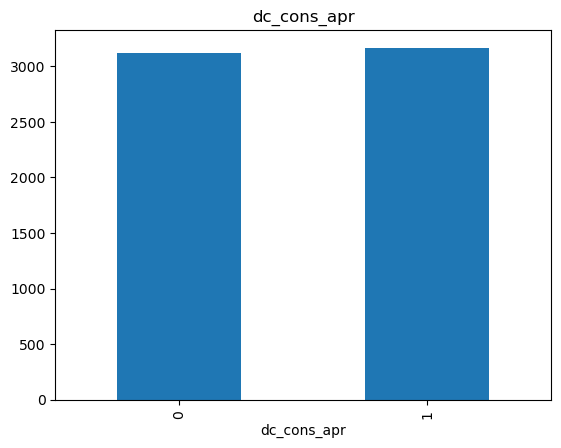

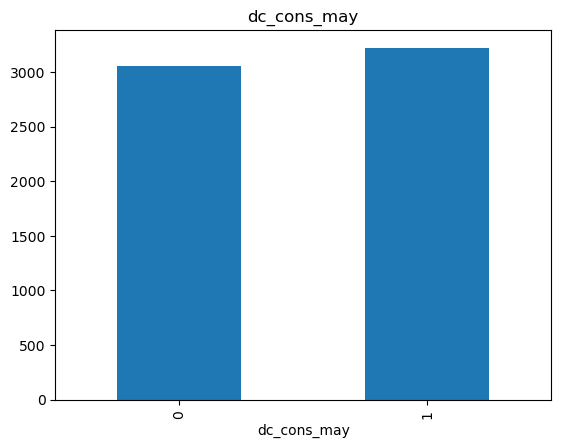

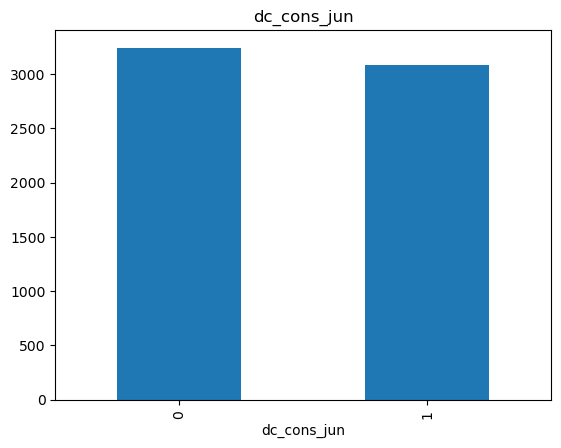

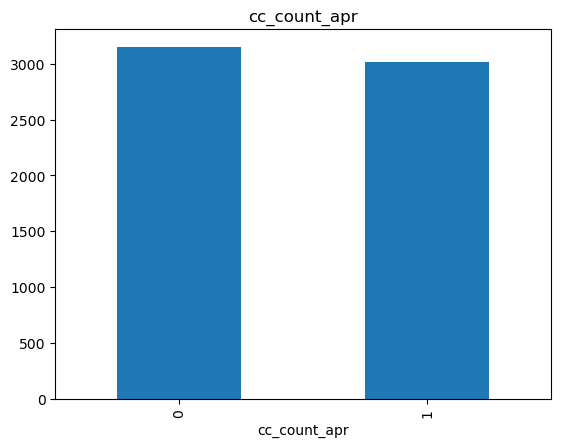

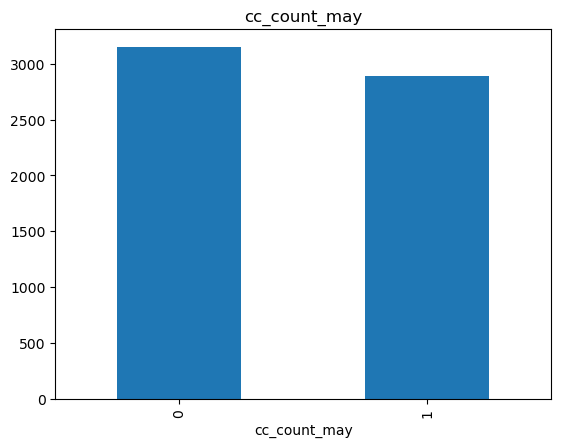

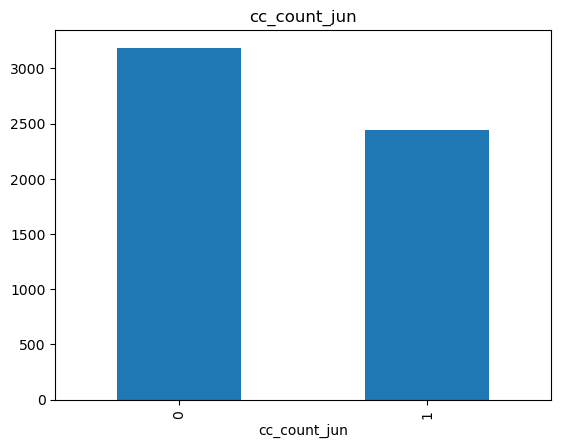

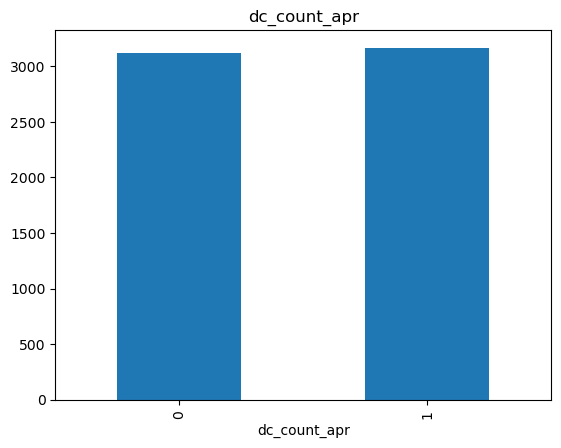

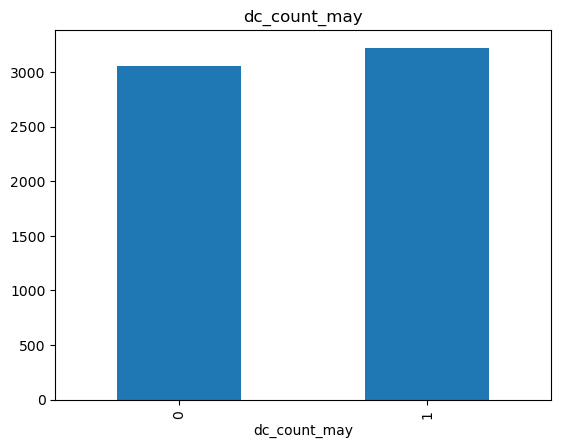

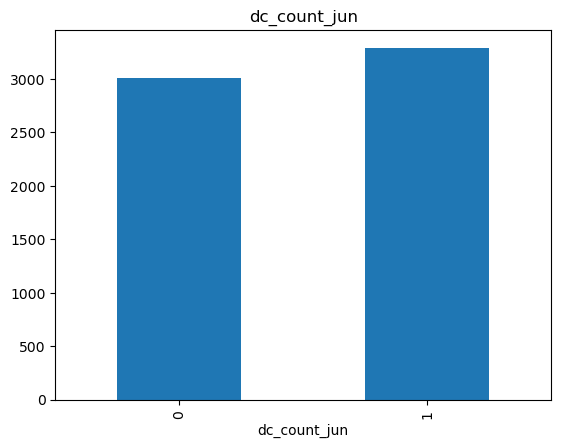

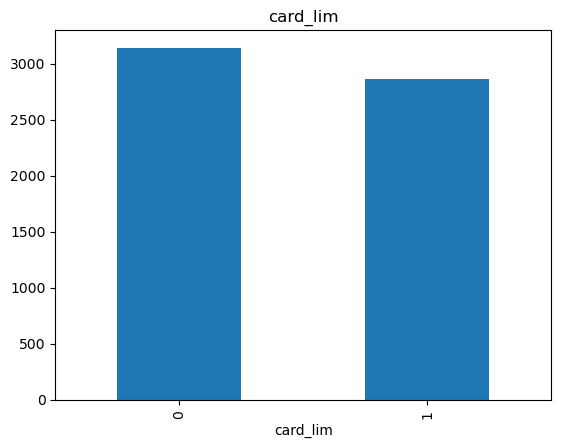

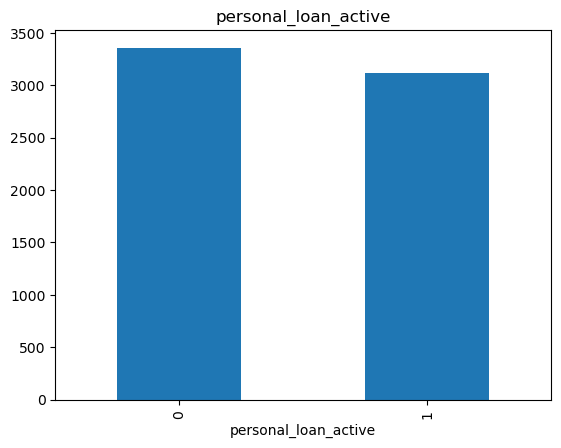

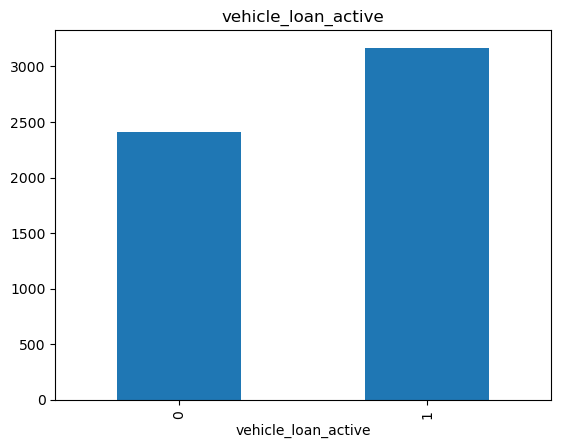

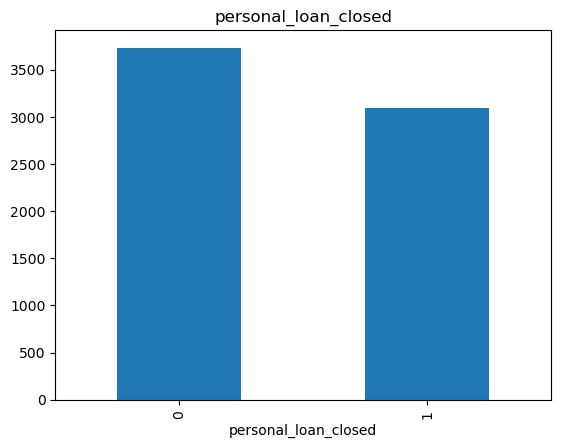

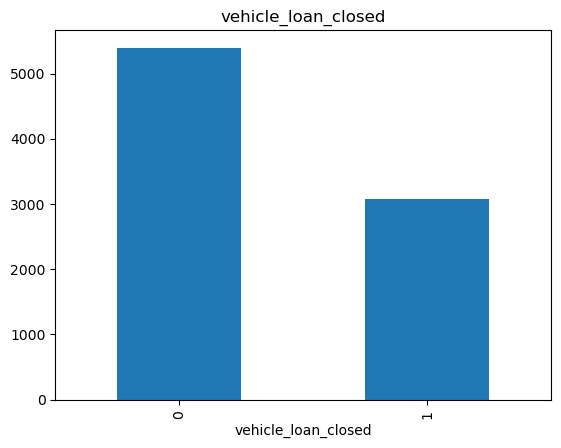

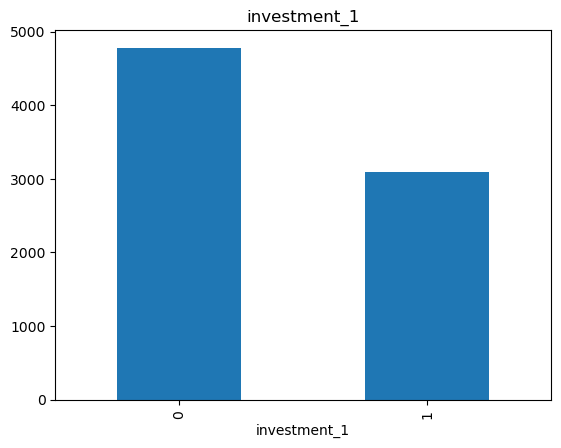

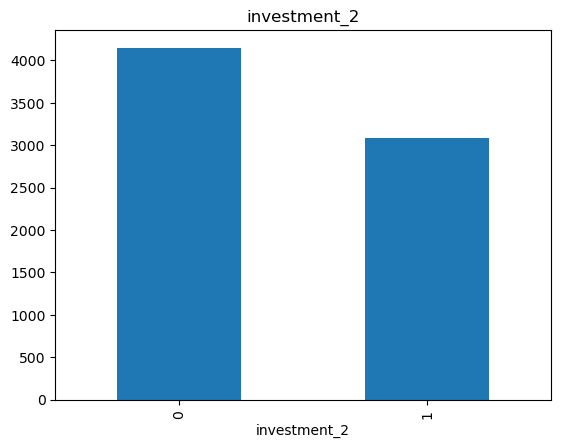

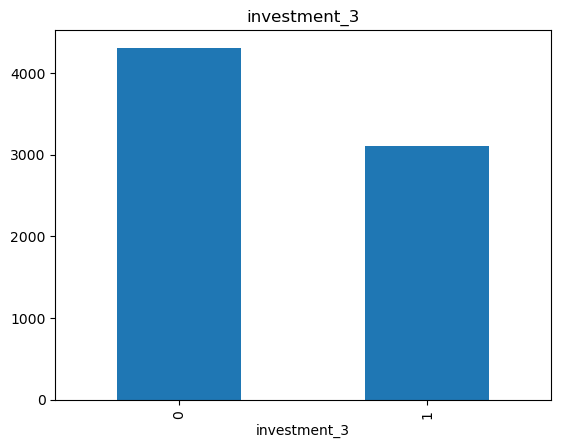

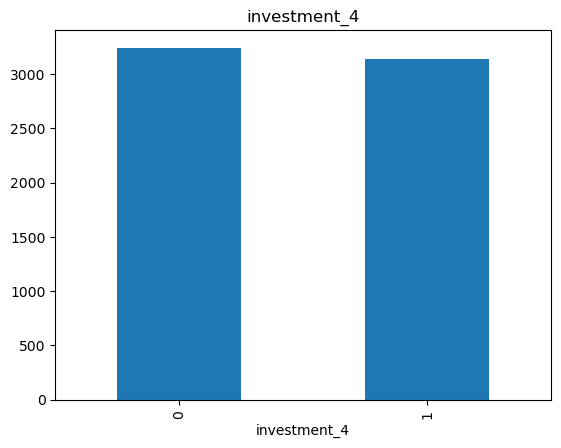

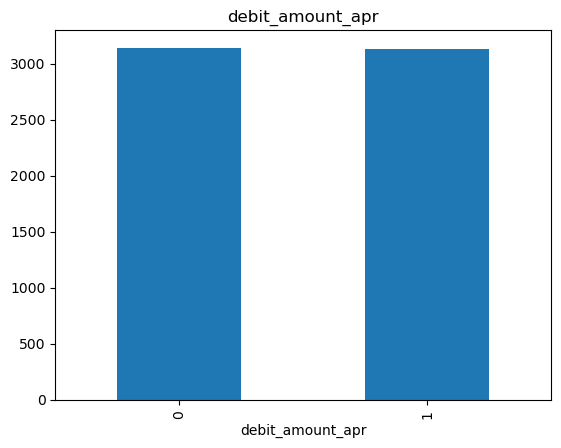

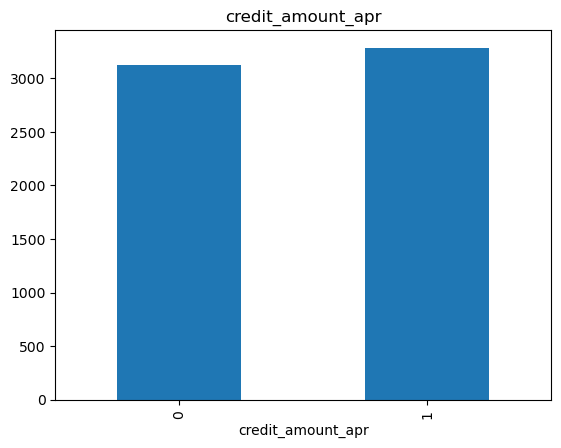

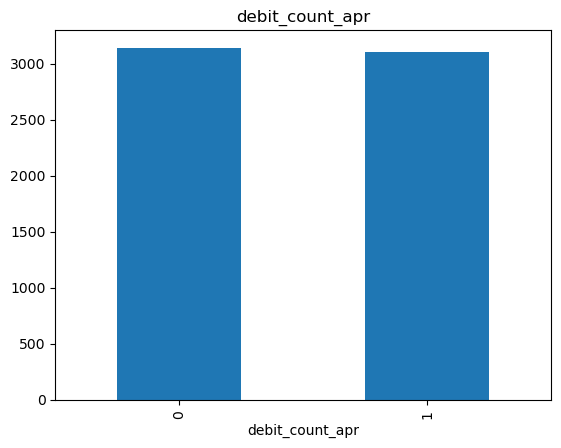

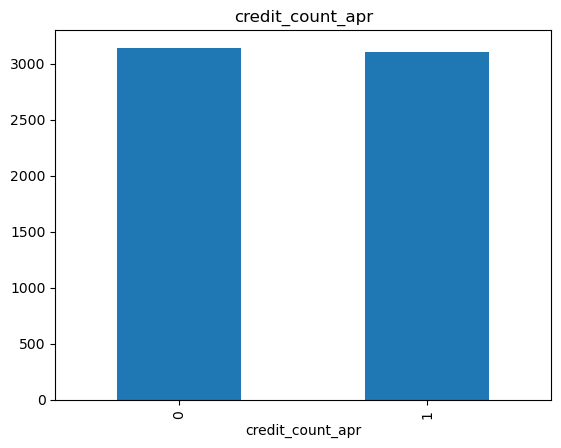

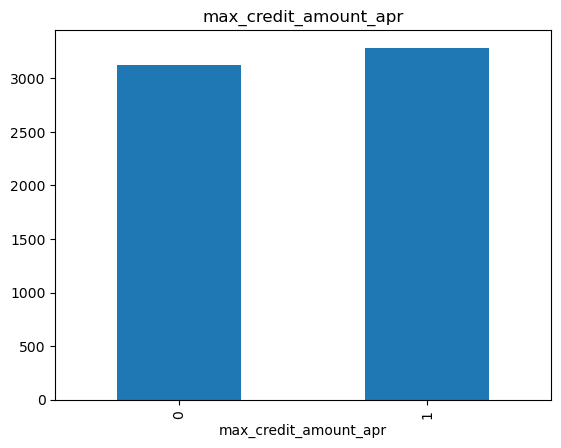

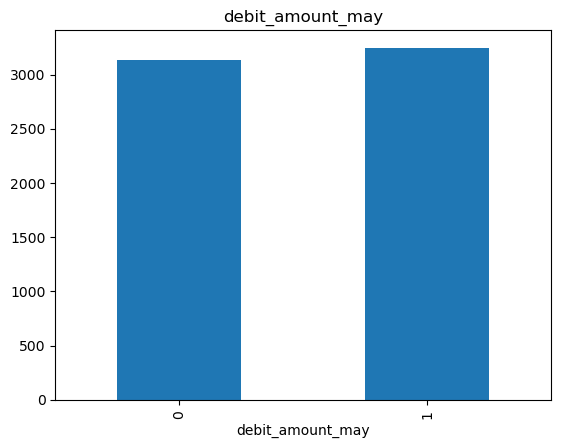

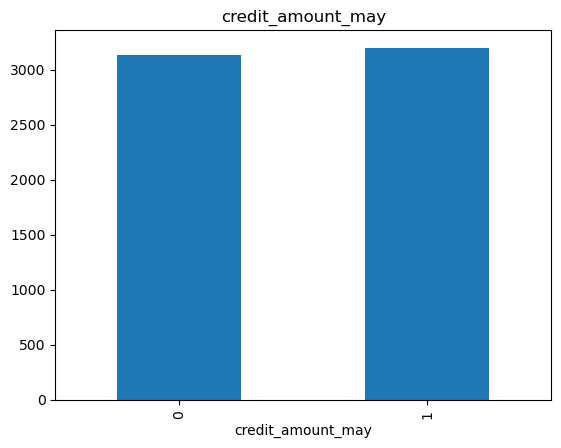

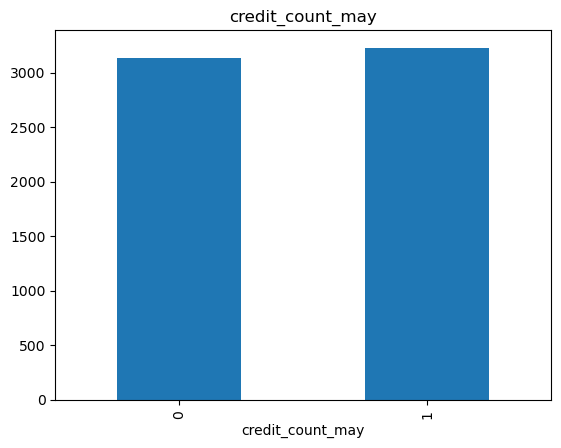

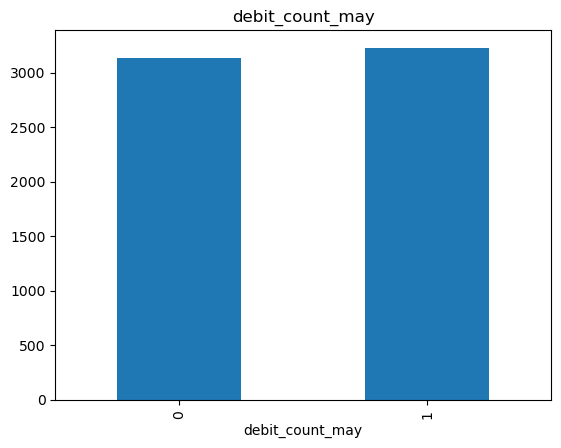

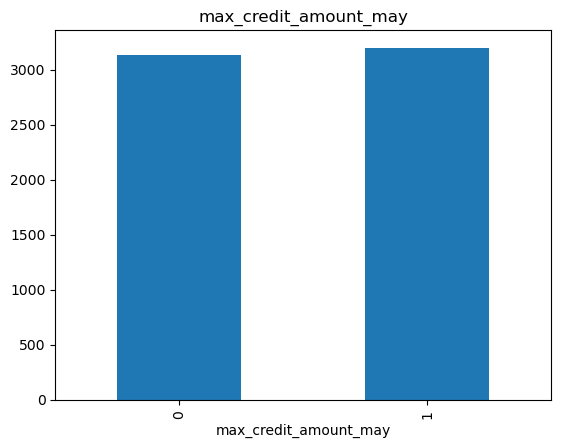

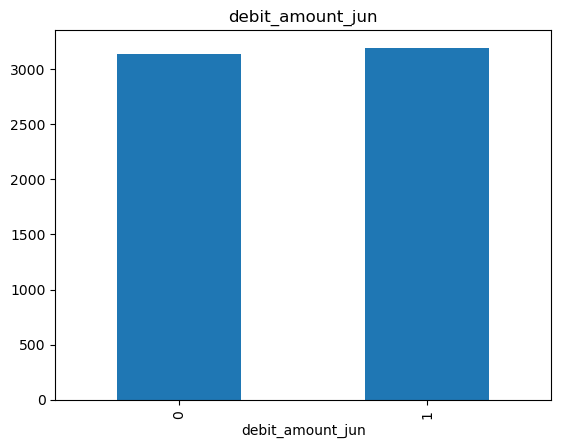

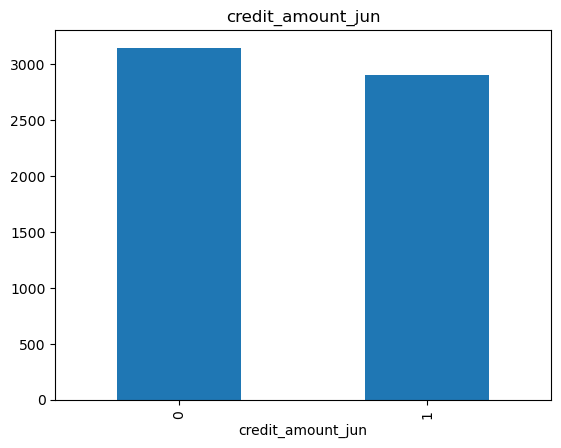

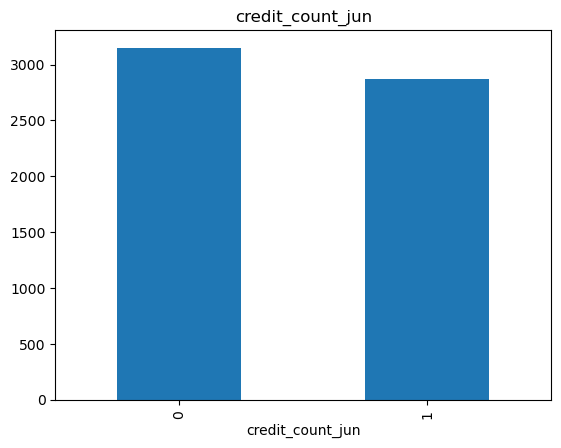

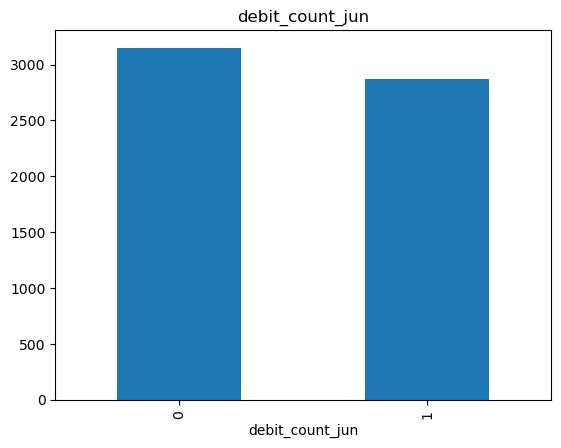

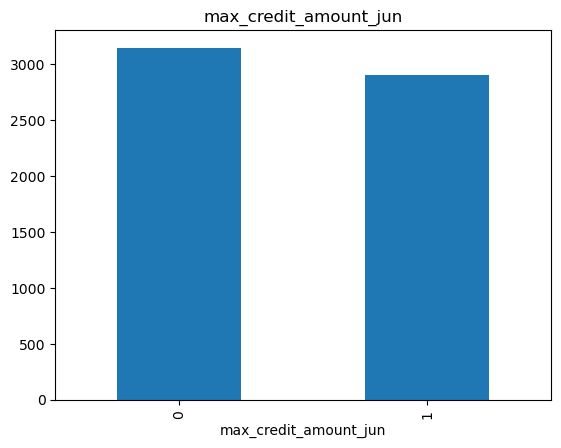

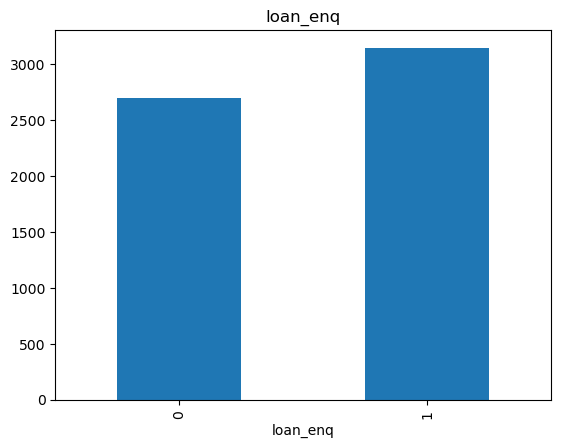

In [6]:
for feature in feature_with_na:
    data=a.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['cc_cons'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [7]:
feature_high_nan=[feature for feature in feature_with_na if np.round(a[feature].isnull().mean(),4)>0.7]
feature_high_nan
                                                                     

['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq']

In [8]:
for feature  in feature_high_nan:
    a[feature].fillna(0,inplace=True)

In [9]:
a.isnull().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active         0
vehicle_loan_active          0
personal_loan_closed         0
vehicle_loan_closed          0
investment_1                 0
investment_2                 0
investment_3                 0
investment_4                 0
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [10]:
numerical_features=[feature for feature in a.columns if a[feature].dtype!='object']
a[numerical_features]

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,3.0,NaN,NaN,NaN,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,11.0,1.0,NaN,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,6.0,NaN,NaN,NaN,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,9.0,NaN,NaN,NaN,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,10.0,NaN,NaN,NaN,140000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691
32816,32511,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,NaN,2.0,7.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275
32817,5192,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,18.0,12.0,2.0,12.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677
32818,12172,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,24.0,3.0,NaN,1.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846


In [11]:
for feature in numerical_features:
    a[feature].fillna(a[feature].median(),inplace=True)

In [12]:
a[numerical_features]

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,63,305,7695.00,2282.16,479.00,2129.0,622.00,1832.00,2.0,1.0,3.0,3.0,4.0,5.0,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,33,326,52702.00,988.72,29873.00,2129.0,1087.00,2806.24,11.0,14.0,11.0,1.0,4.0,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,44,233,20936.00,2282.16,2094.00,2129.0,11778.50,1832.00,9.0,6.0,6.0,3.0,4.0,5.0,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,35,324,1183.83,2282.16,3656.29,2129.0,945.00,1832.00,2.0,7.0,9.0,3.0,4.0,5.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,43,583,45275.20,2282.16,48901.62,2129.0,47267.41,1832.00,19.0,10.0,10.0,3.0,4.0,5.0,140000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691
32816,32511,33,623,1627.00,2282.16,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,3.0,2.0,7.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275
32817,5192,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,7.0,56.0,18.0,12.0,2.0,12.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677
32818,12172,33,535,9877.30,373.00,9018.22,2129.0,2804.00,1832.00,17.0,15.0,24.0,3.0,4.0,1.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846


In [13]:
a.isnull().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
c

In [14]:
a.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,3727.529773,1.441190e+04,3782.998580,9031.179889,2827.259072,9.004144,9.450945,12.138879,3.946770,5.069622,6.529098,121540.983547,0.083547,0.025777,0.087843,0.049512,3.525947e+04,1.257661e+04,1.613573e+03,61.514099,6.836608e+04,7.224613e+04,14.732633,3.749360,4.462594e+04,6.508209e+04,7.604463e+04,4.018739,13.749604,4.765338e+04,7.547919e+04,7.428948e+04,5.731993,15.861700,4.390353e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,7667.686645,2.363688e+04,9808.446086,15720.847307,6230.989659,10.404075,9.488920,11.448896,4.134113,5.193392,6.836847,123005.372639,0.276711,0.158472,0.283070,0.216939,9.355132e+05,1.259663e+05,1.870329e+04,873.147187,1.595384e+05,1.688081e+05,11.293698,3.392404,1.121762e+05,1.790612e+05,1.921688e+05,3.733756,11.110796,1.220130e+05,3.034309e+05,2.990735e+05,4.596735,13.070544,1.187066e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,2282.160000,2.983298e+03,2129.000000,1637.875000,1832.000000,3.000000,3.000000,5.000000,3.000000,4.000000,4.000000,45000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.334515e+04,2.728763e+04,7.000000,2.000000,1.920000e+04,2.130144e+04,2.654400e+04,2.000000,6.000000,1.989472e+04,2.635132e+04,2.405212e+04,3.000000,7.000000,1.668150e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.114024e+04,4.394596e+04,12.000000,3.000000,2.813100e+04,3.836849e+04,4.538700e+04,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,2282.160000,1.684785e+04,2129.000000,10126.250000,1832.000000,12.000000,13.000000,16.000000,3.000000,4.000000,5.000000,145000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.207154e+04,7.347238e+04,20.000000,5.000000,4.470000e+04,6.946070e+04,8.123050e+04,5.000000,18.000000,4.900000e+04,7.978210e+04,7.769936e+04,7.000000,21.000000,4.506050e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,38

In [15]:
discrete_features=[feature for feature in numerical_features if len(a[feature].unique())<2500]
print('discrete variable count : {}'.format(len(discrete_features)))

discrete variable count : 23


In [16]:
discrete_features

['age',
 'region_code',
 'cc_count_apr',
 'cc_count_may',
 'cc_count_jun',
 'dc_count_apr',
 'dc_count_may',
 'dc_count_jun',
 'card_lim',
 'personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'debit_count_apr',
 'credit_count_apr',
 'credit_count_may',
 'debit_count_may',
 'credit_count_jun',
 'debit_count_jun']

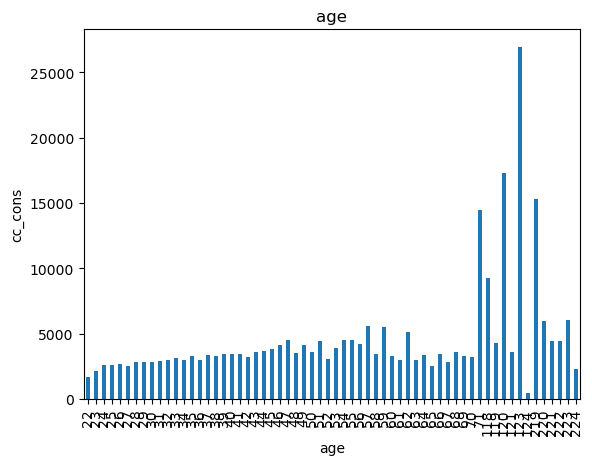

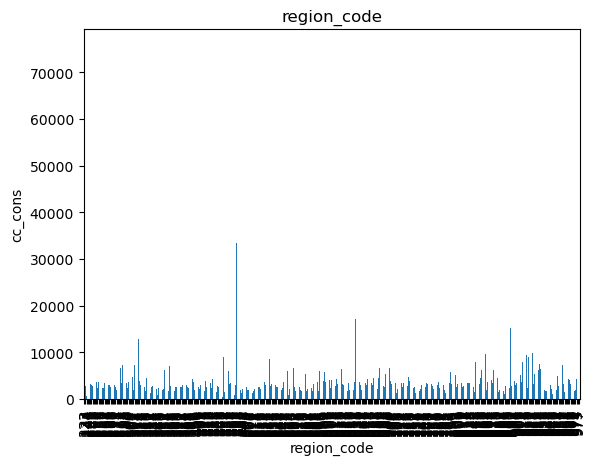

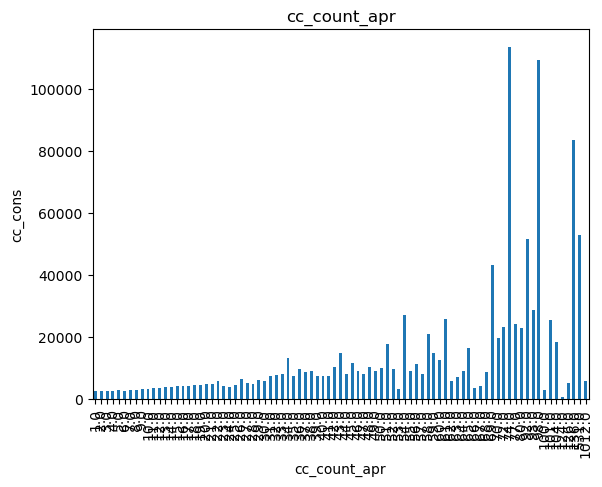

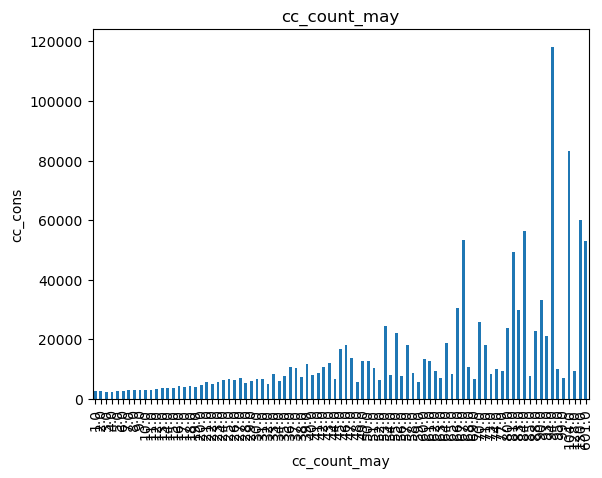

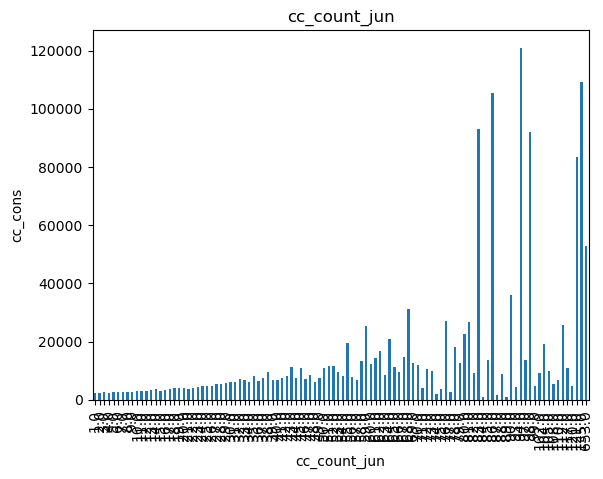

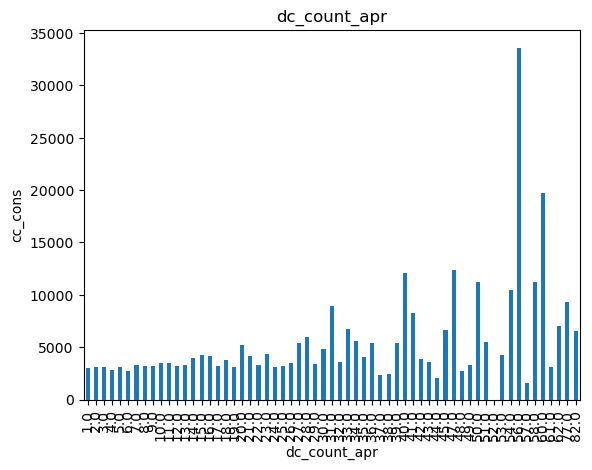

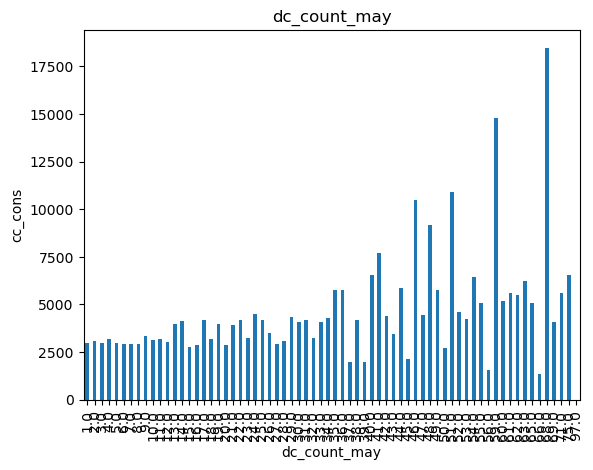

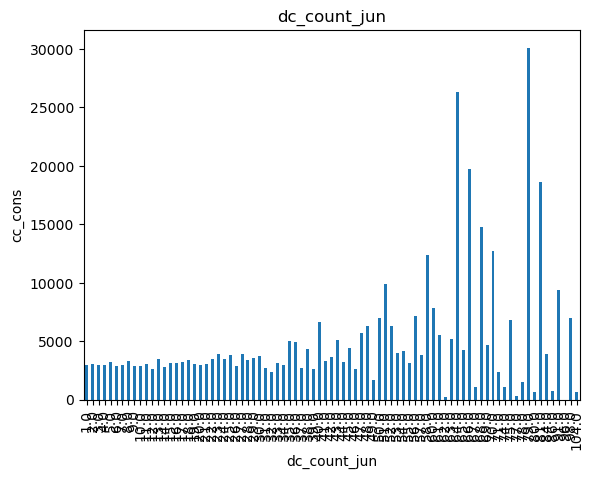

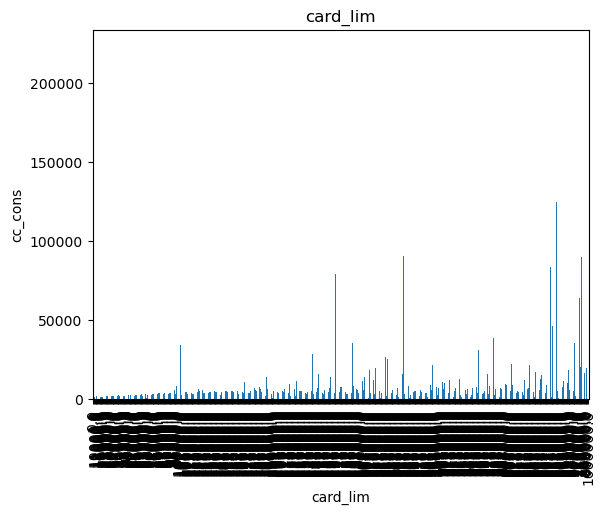

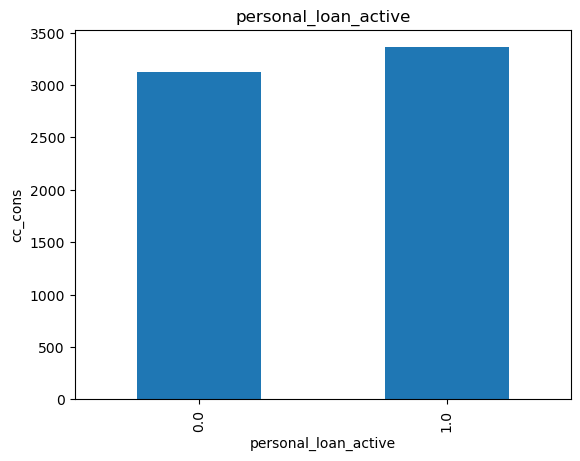

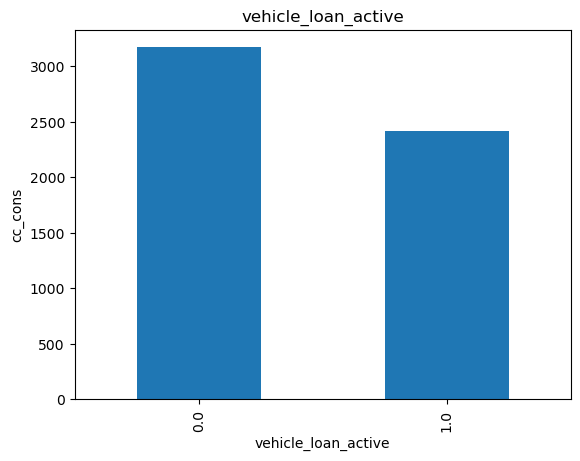

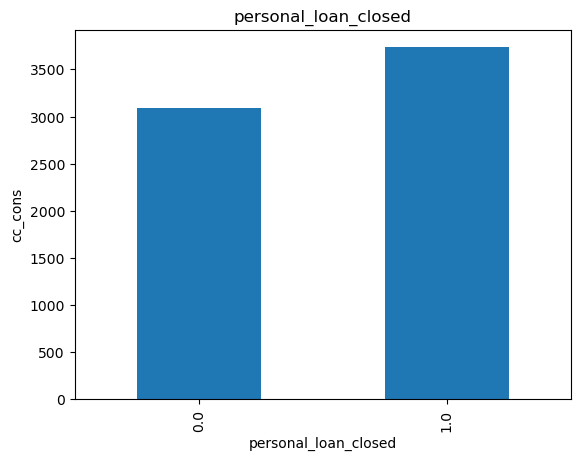

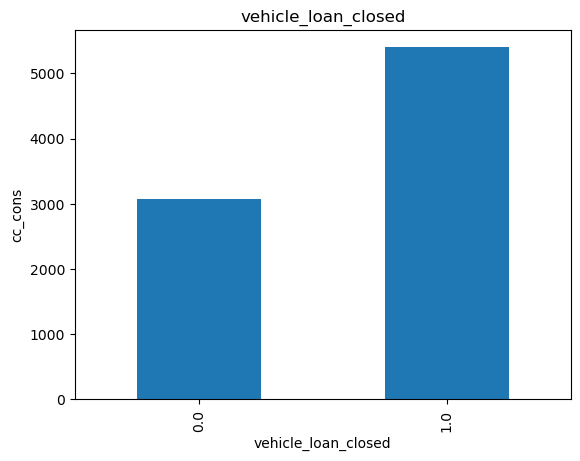

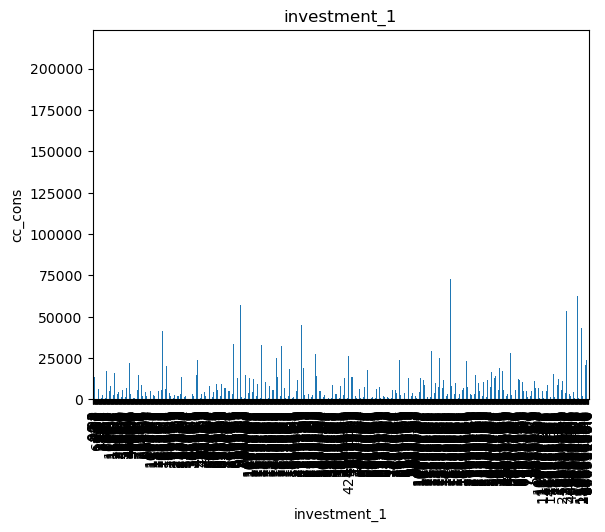

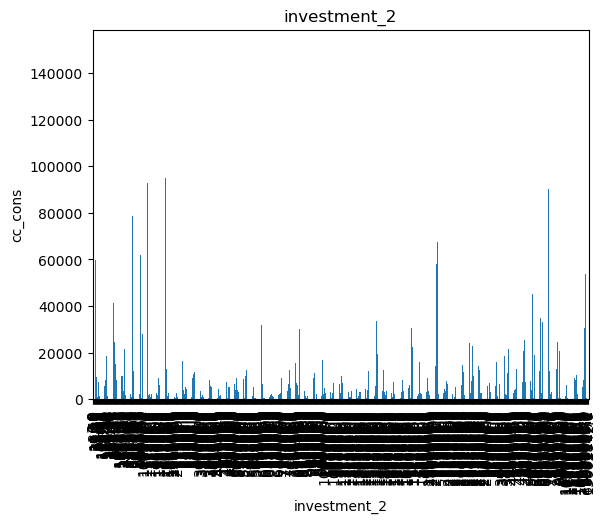

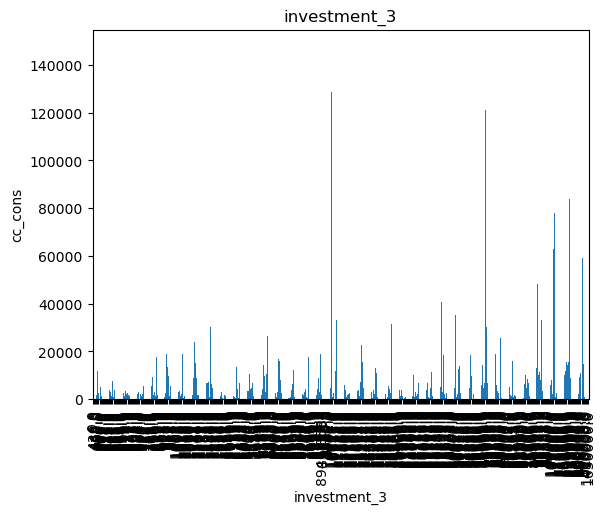

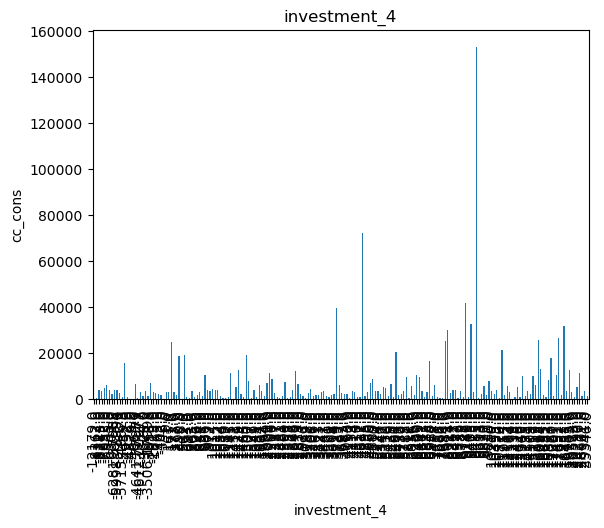

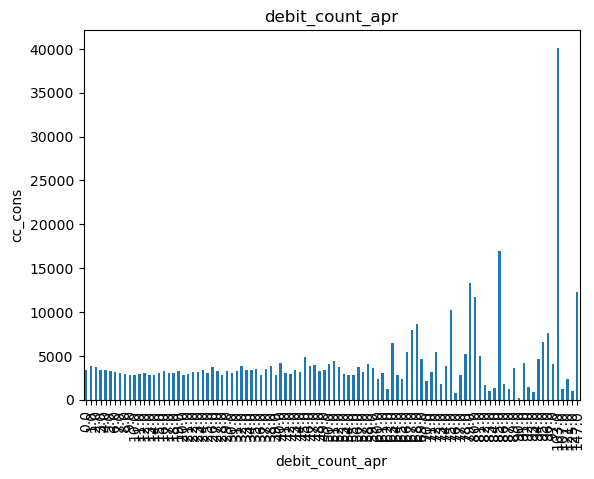

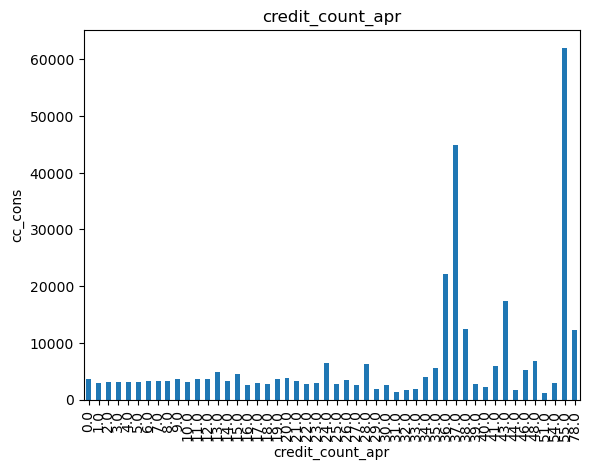

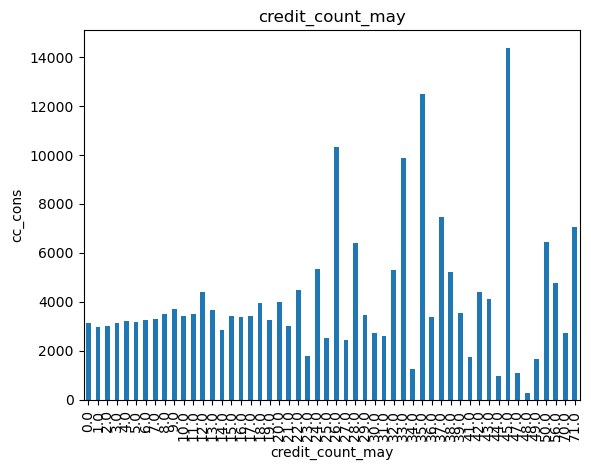

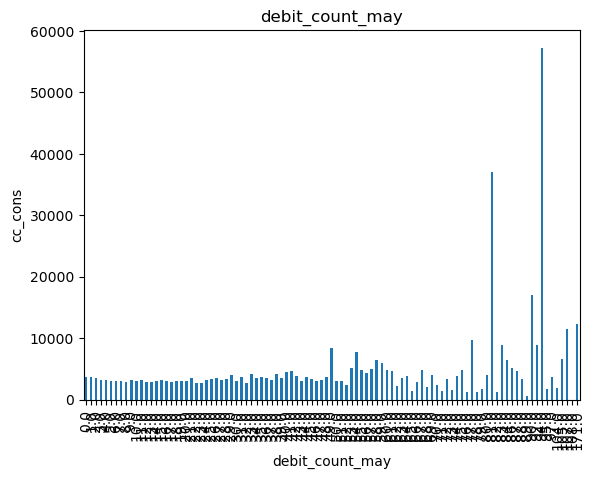

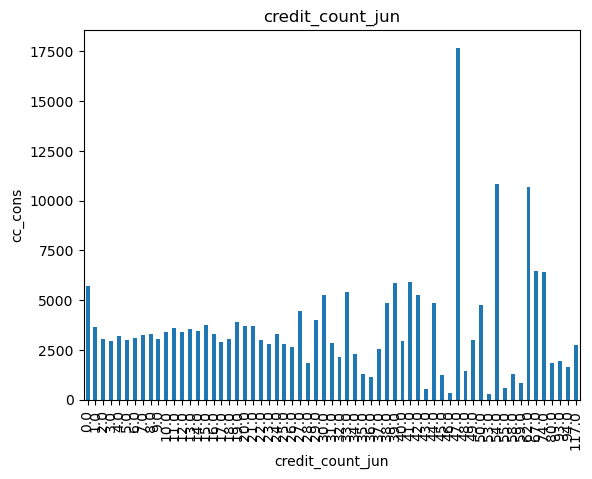

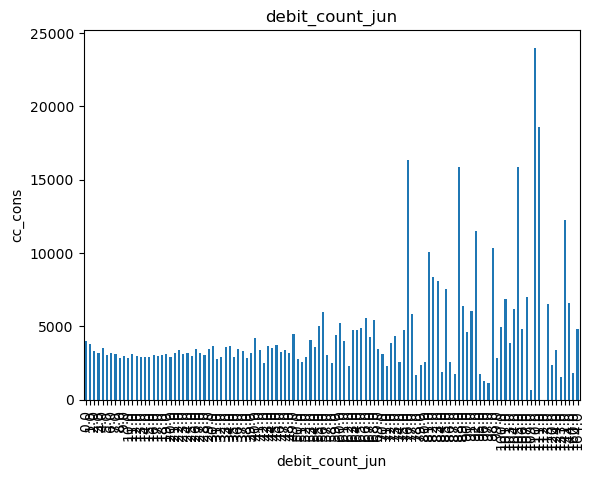

In [17]:
for feature in discrete_features:
    data=a.copy()
    data.groupby(feature)['cc_cons'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('cc_cons')
    plt.title(feature)
    plt.show()

In [18]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['id']]
print('continuous variable count : {}'.format(len(continuous_features)))

continuous variable count : 17


In [19]:
continuous_features

['cc_cons_apr',
 'dc_cons_apr',
 'cc_cons_may',
 'dc_cons_may',
 'cc_cons_jun',
 'dc_cons_jun',
 'debit_amount_apr',
 'credit_amount_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'max_credit_amount_may',
 'debit_amount_jun',
 'credit_amount_jun',
 'max_credit_amount_jun',
 'emi_active',
 'cc_cons']

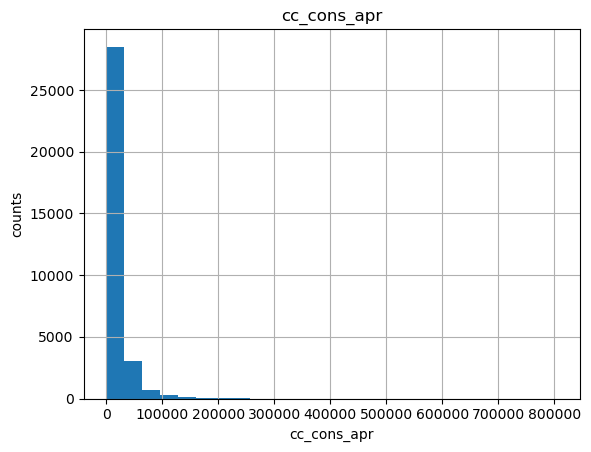

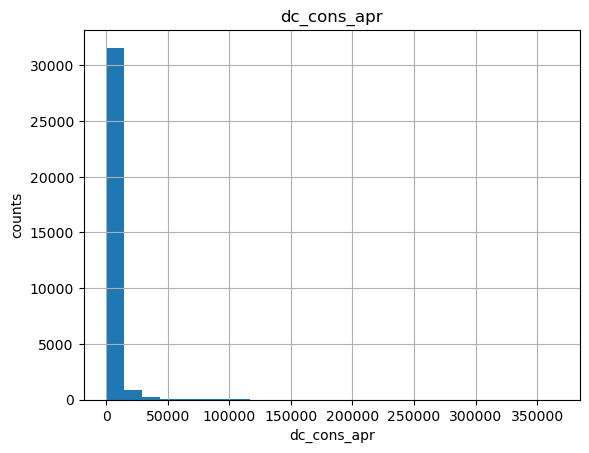

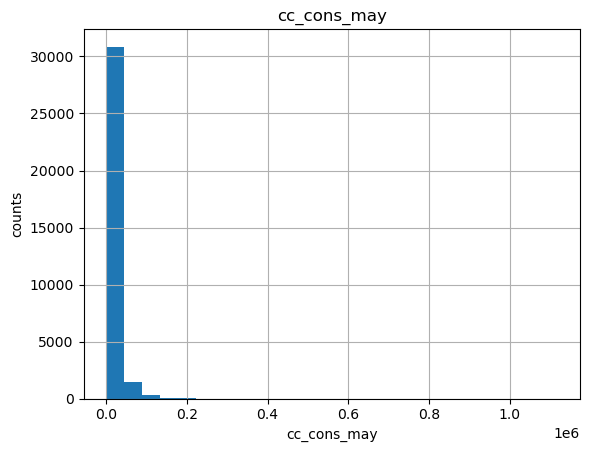

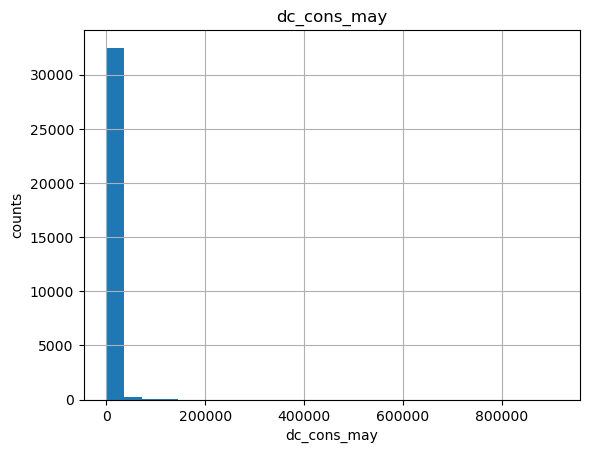

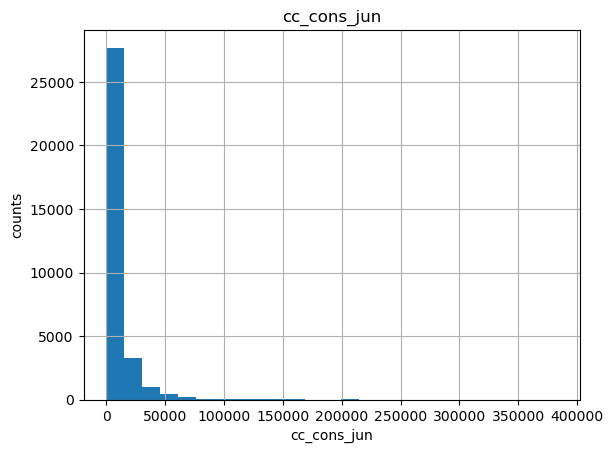

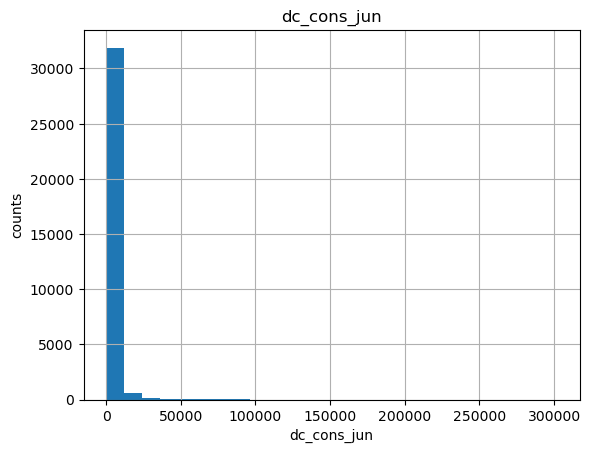

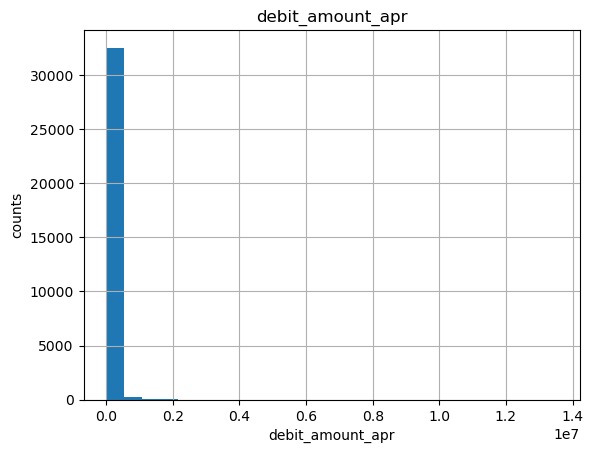

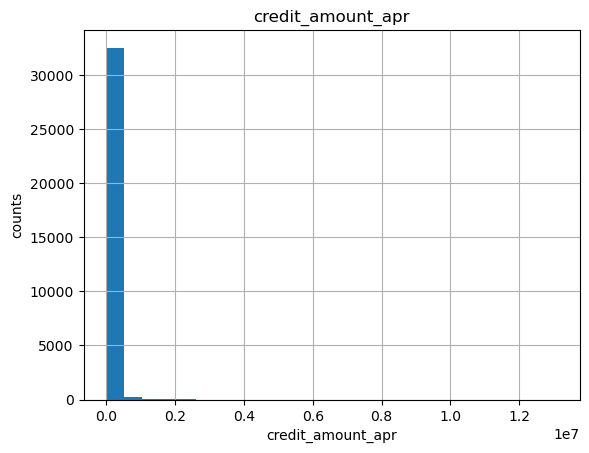

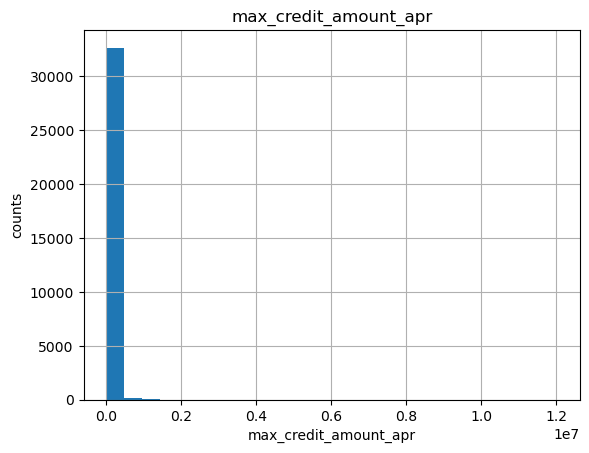

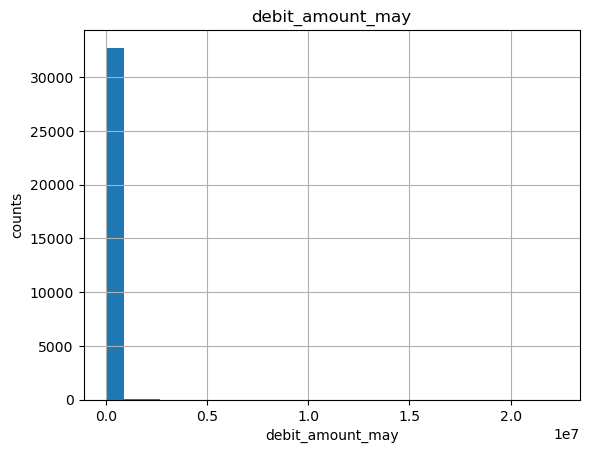

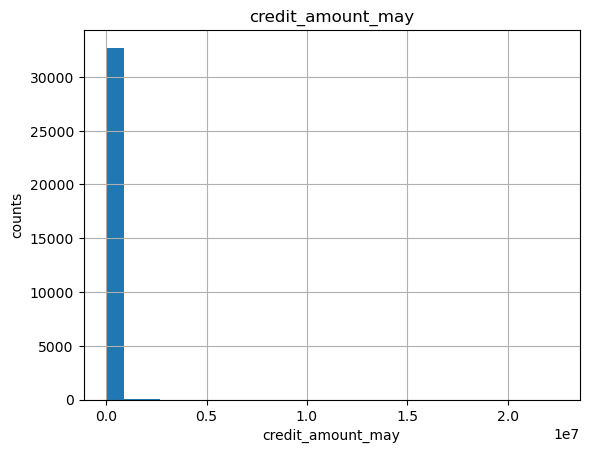

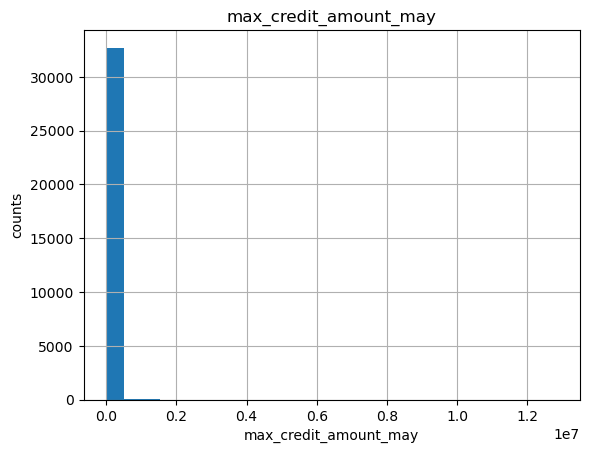

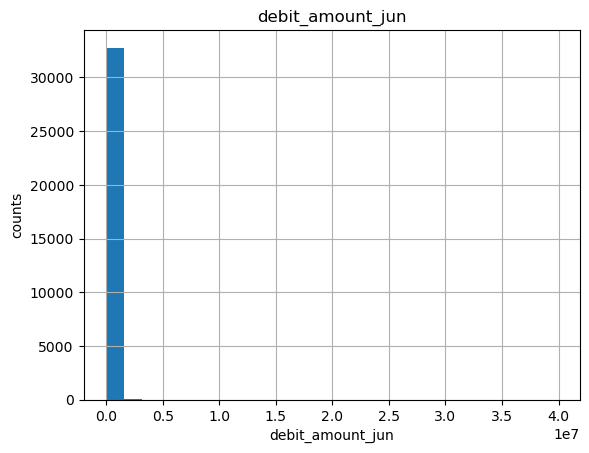

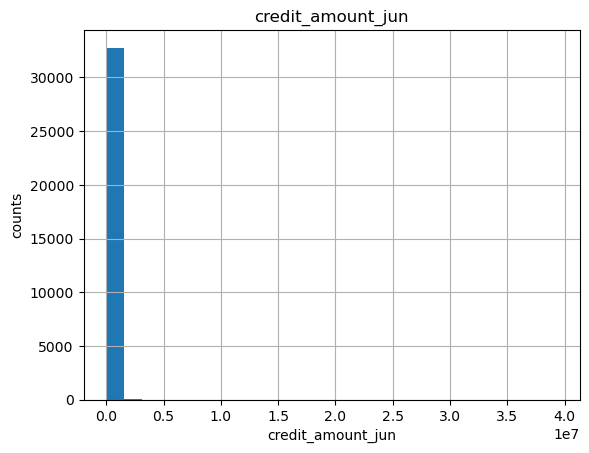

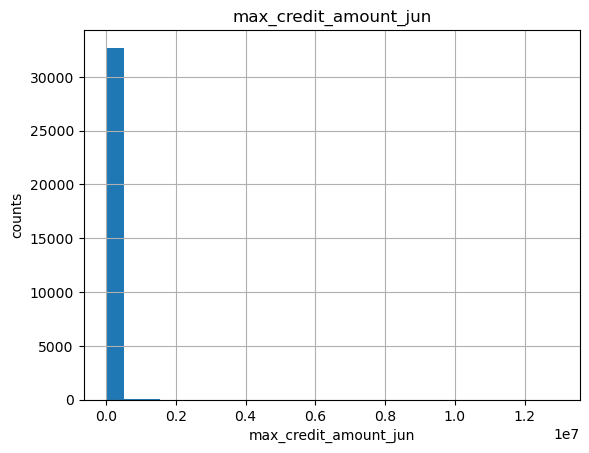

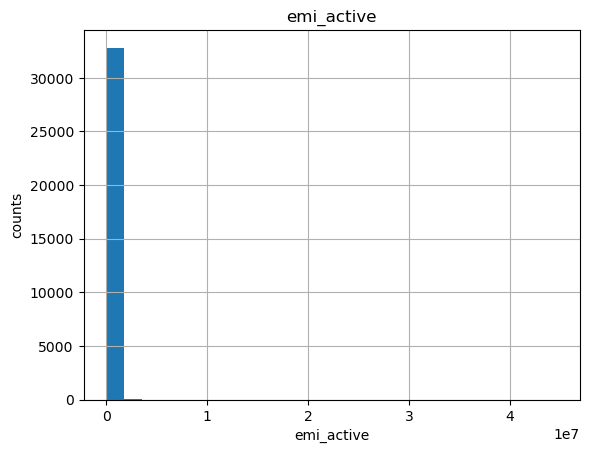

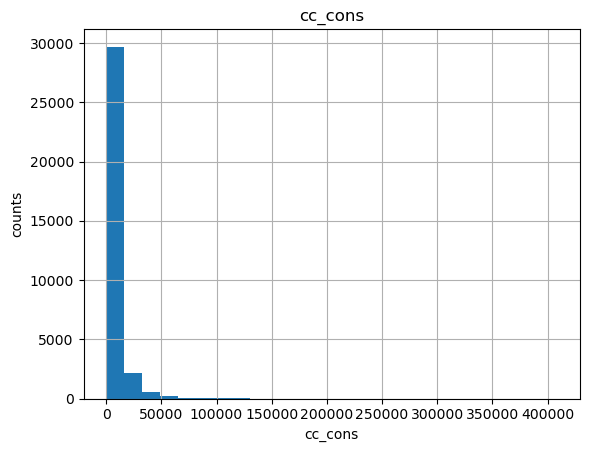

In [20]:
for feature in continuous_features:
    data=a.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.title(feature)
    plt.show()
    

/Users/yalla.lalith/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


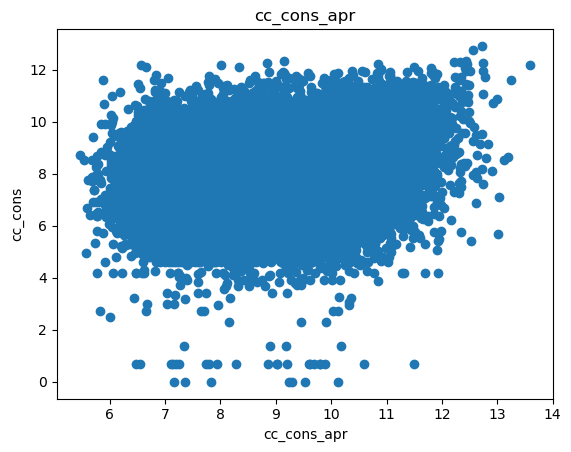

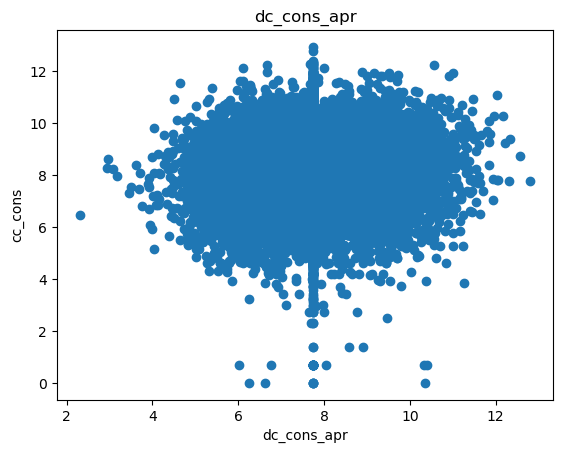

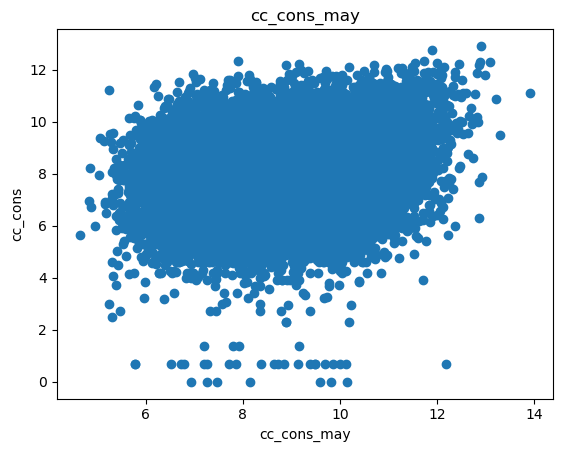

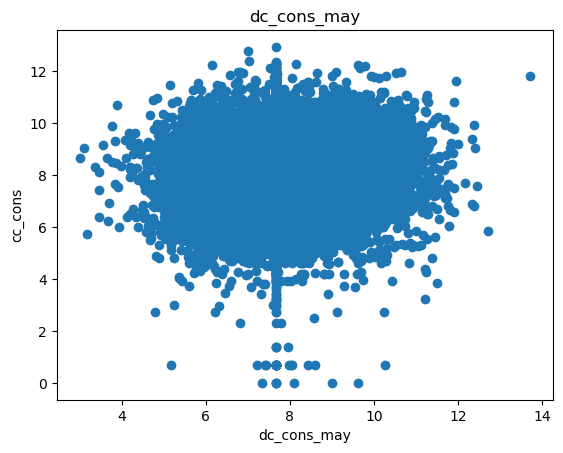

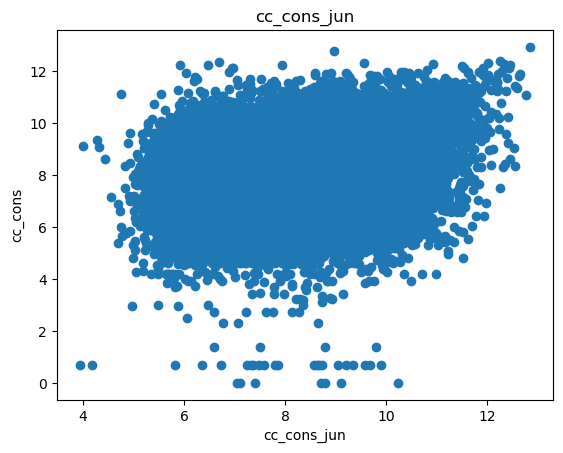

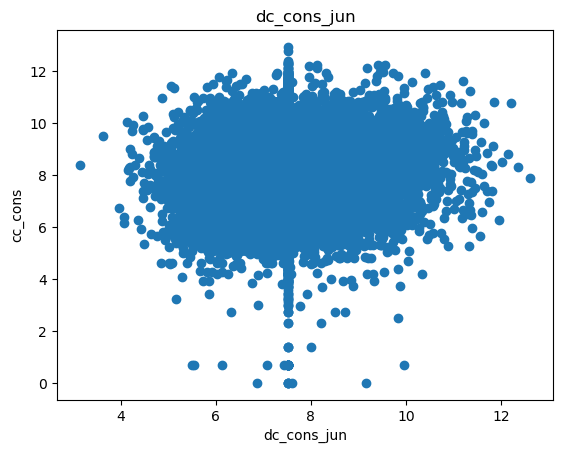

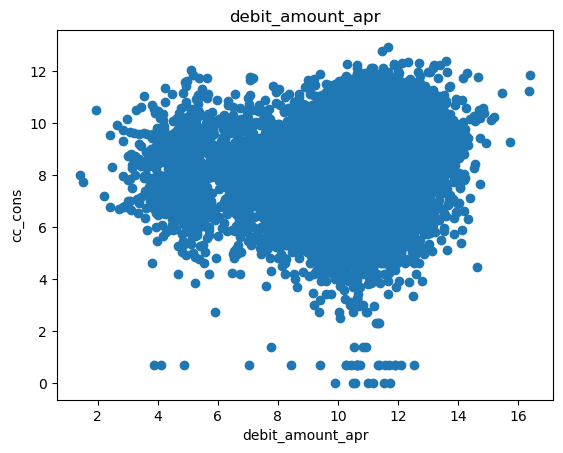

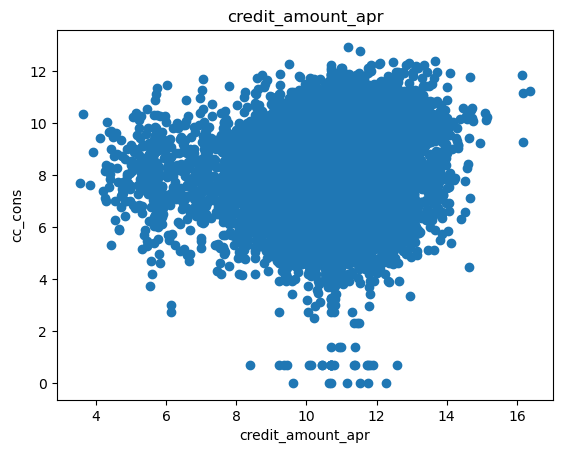

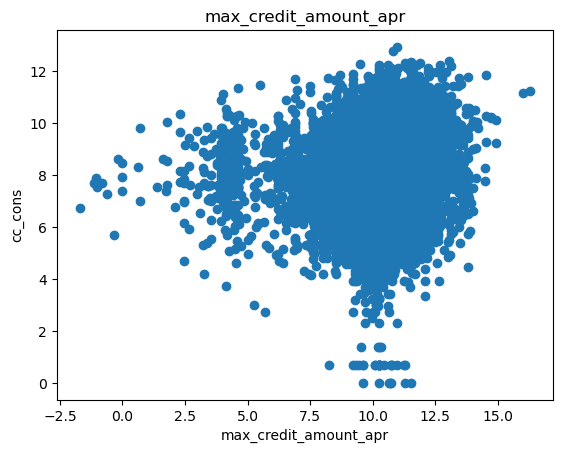

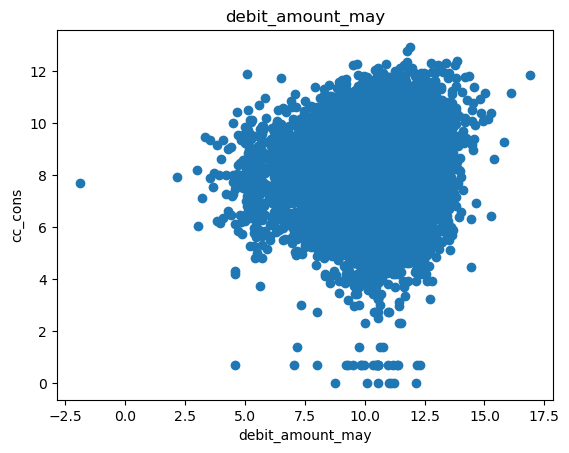

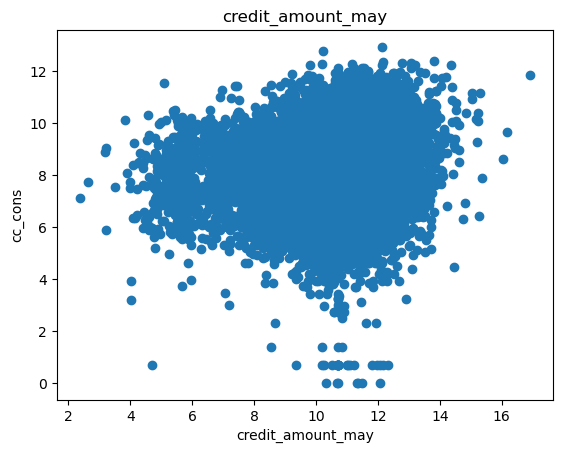

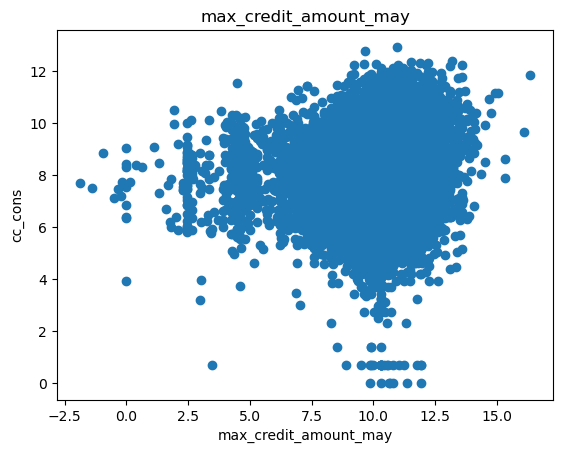

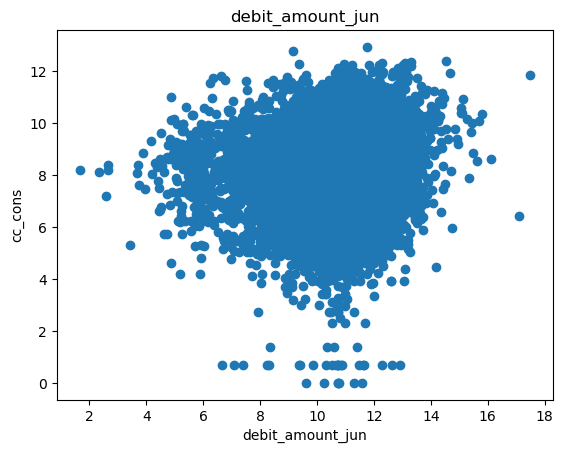

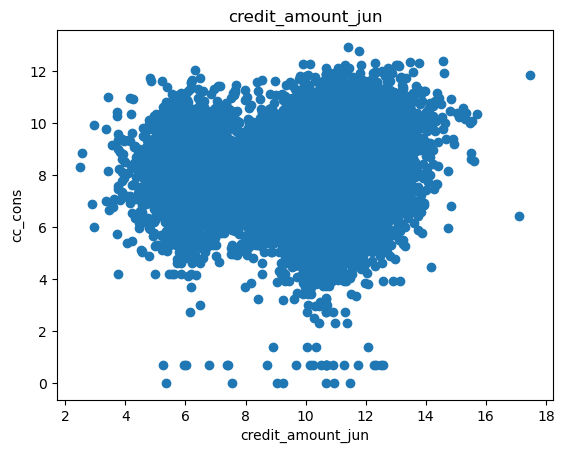

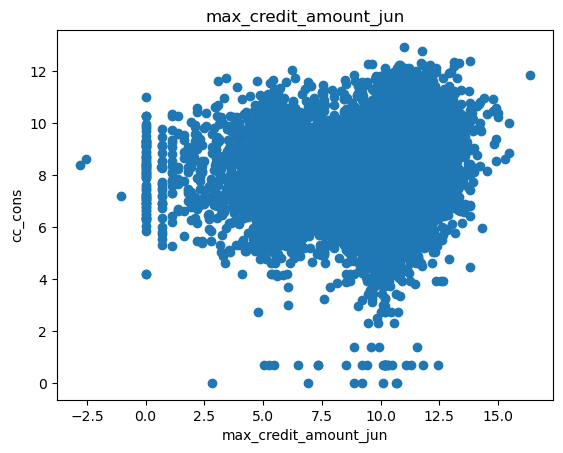

In [21]:
for feature in continuous_features:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['cc_cons']=np.log(data['cc_cons'])
        plt.scatter(data[feature],data['cc_cons'])
        plt.xlabel(feature)
        plt.ylabel('cc_cons')
        plt.title(feature)
        plt.show()
    

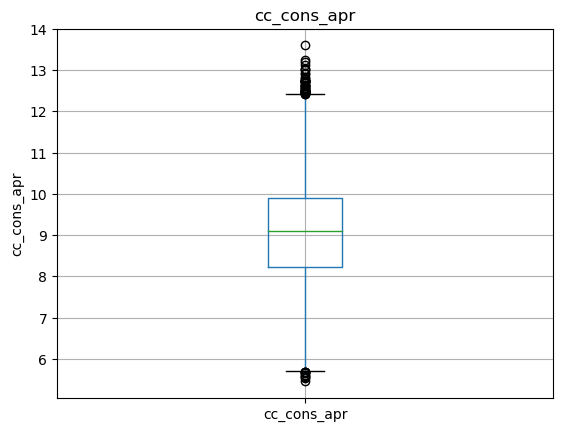

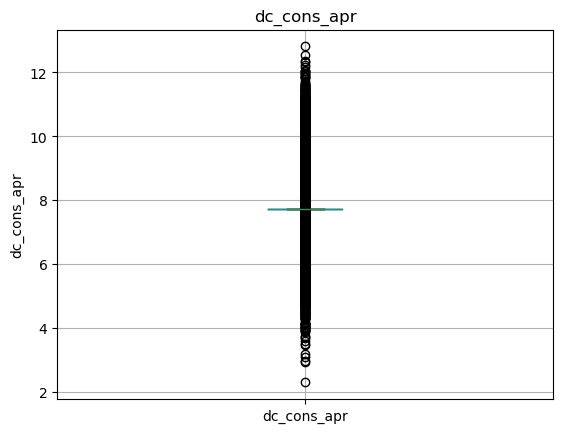

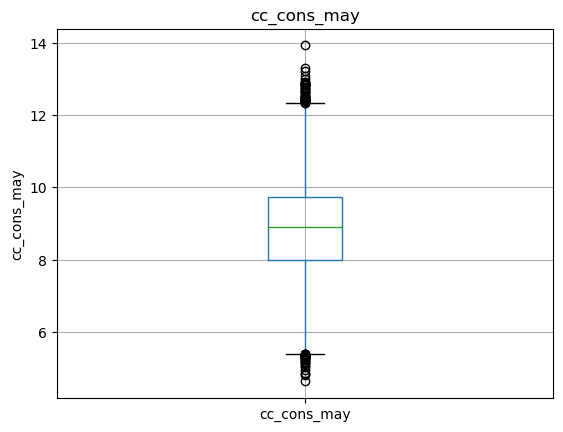

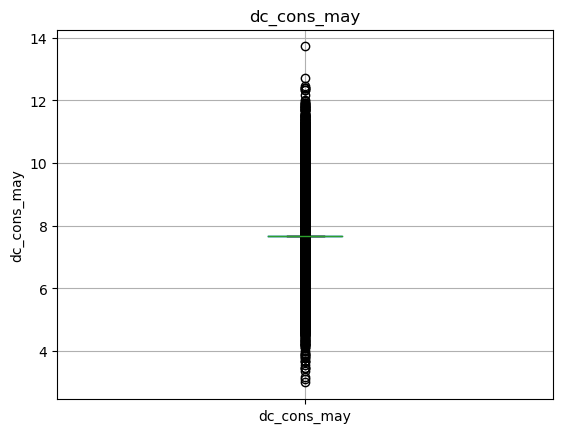

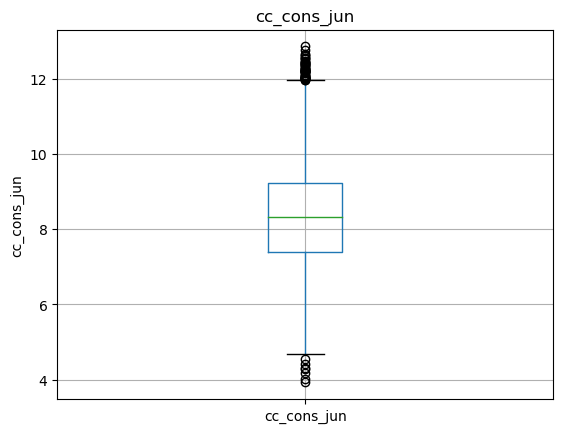

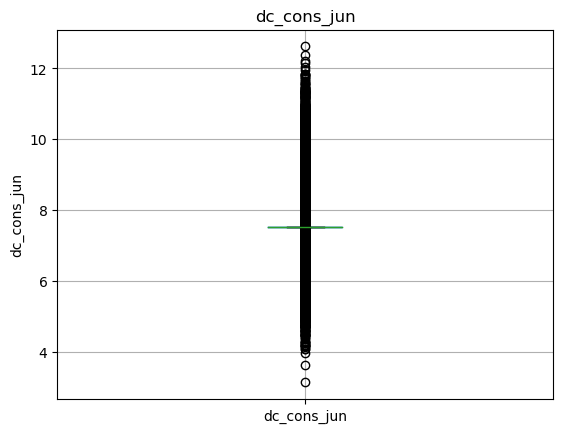

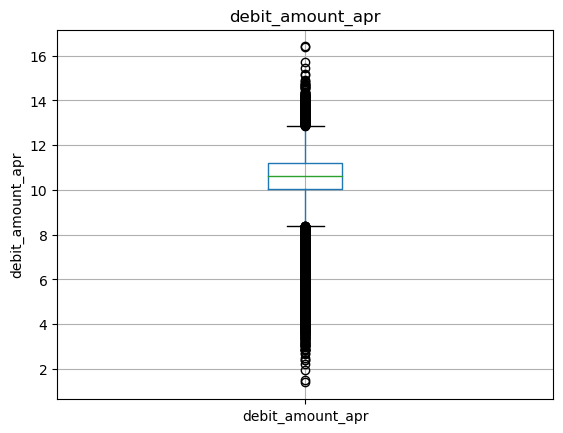

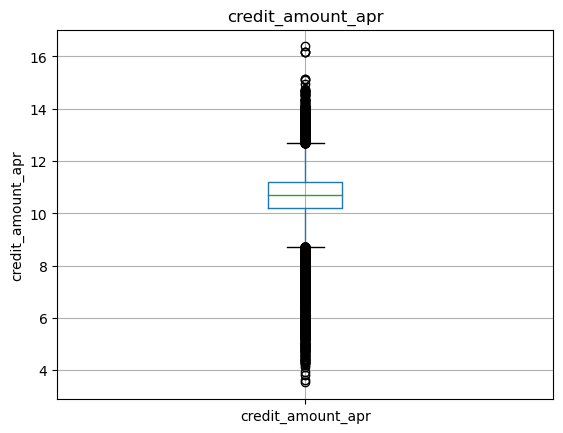

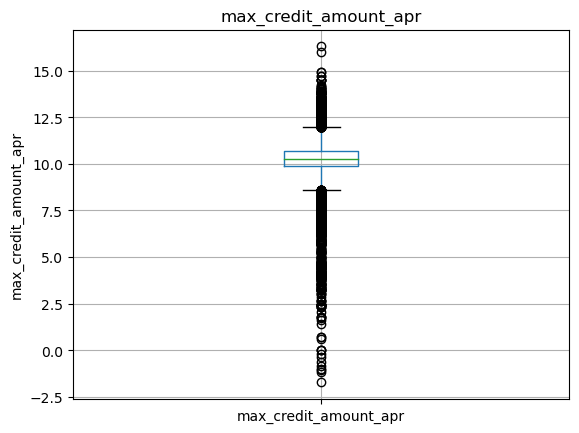

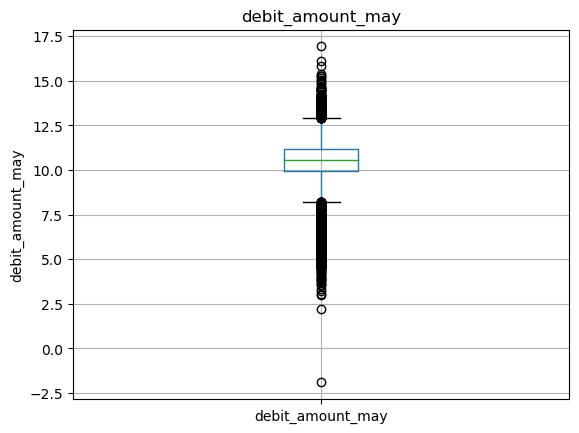

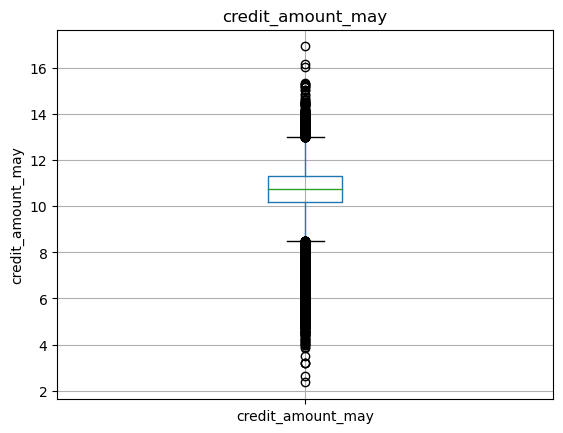

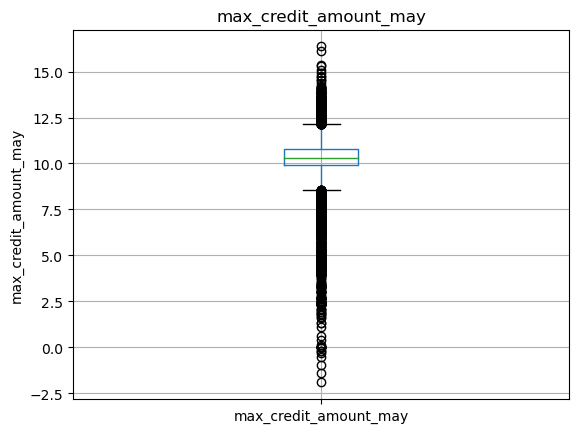

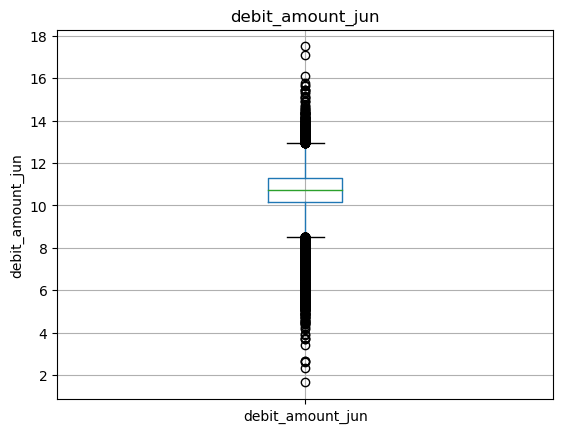

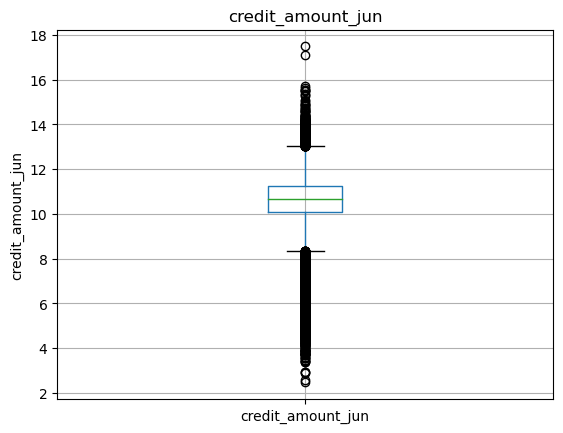

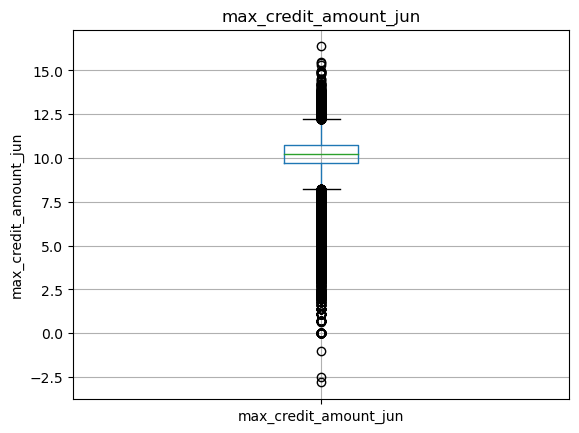

In [22]:
for feature in continuous_features:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [23]:
categorical_features=[feature for feature in a.columns if a[feature].dtype=='object'] 
categorical_features


['account_type', 'gender', 'loan_enq']

In [24]:
a[categorical_features]

,account_type,gender,loan_enq
0,saving,M,0
1,current,M,0
2,current,M,0
3,saving,M,0
4,saving,F,0
...,...,...,...
32815,saving,M,0
32816,current,M,0
32817,current,M,0
32818,current,M,0


In [25]:
for feature in categorical_features:
    print(feature,a[feature].unique())

account_type ['saving' 'current']
gender ['M' 'F']
loan_enq [0 'Y']


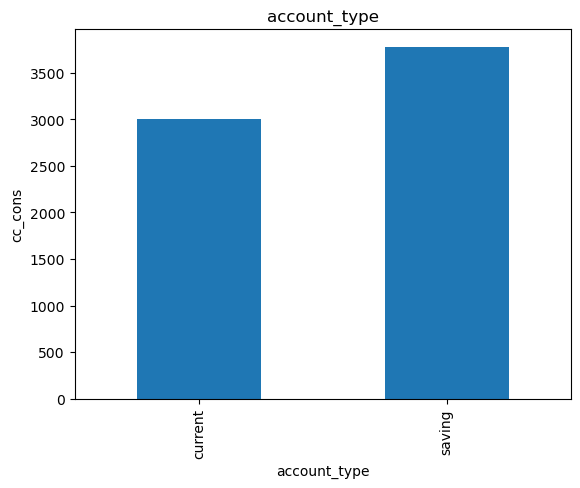

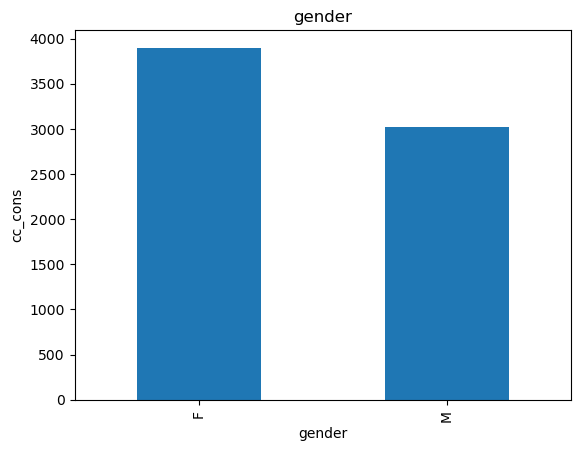

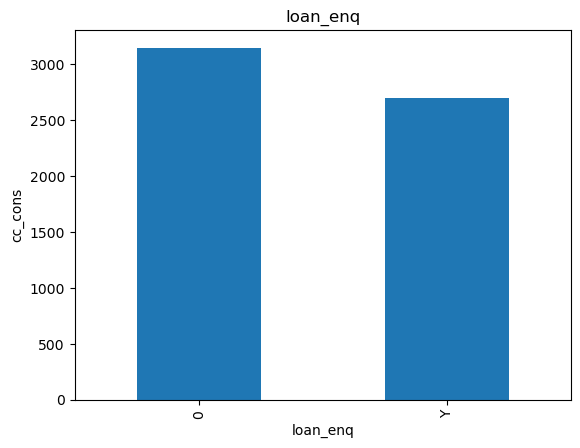

In [26]:
for feature in categorical_features:
    data=a.copy()
    data.groupby(feature)['cc_cons'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('cc_cons')
    plt.title(feature)
    plt.show()

In [27]:
a.isnull().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
c

In [28]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   account_type           32820 non-null  object 
 2   gender                 32820 non-null  object 
 3   age                    32820 non-null  int64  
 4   region_code            32820 non-null  int64  
 5   cc_cons_apr            32820 non-null  float64
 6   dc_cons_apr            32820 non-null  float64
 7   cc_cons_may            32820 non-null  float64
 8   dc_cons_may            32820 non-null  float64
 9   cc_cons_jun            32820 non-null  float64
 10  dc_cons_jun            32820 non-null  float64
 11  cc_count_apr           32820 non-null  float64
 12  cc_count_may           32820 non-null  float64
 13  cc_count_jun           32820 non-null  float64
 14  dc_count_apr           32820 non-null  float64
 15  dc

In [29]:
bins = [0, 30, 40, 50, 60, float("inf")]
labels = ['0-30', '31-40', '41-50', '51-60', '60+']
a['age_group'] = pd.cut(a['age'], bins=bins, labels=labels)

In [30]:
a['gender']=a['gender'].apply(lambda x:1 if x=='M' else 0)

In [31]:
a

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,age_group
0,23334,saving,1,63,305,7695.00,2282.16,479.00,2129.0,622.00,1832.00,2.0,1.0,3.0,3.0,4.0,5.0,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0,0.00,435,60+
1,20329,current,1,33,326,52702.00,988.72,29873.00,2129.0,1087.00,2806.24,11.0,14.0,11.0,1.0,4.0,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,0,4963.33,1921,31-40
2,17679,current,1,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0,0.00,1970,41-50
3,16428,saving,1,44,233,20936.00,2282.16,2094.00,2129.0,11778.50,1832.00,9.0,6.0,6.0,3.0,4.0,5.0,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,0,1238.18,21579,41-50
4,18721,saving,0,35,324,1183.83,2282.16,3656.29,2129.0,945.00,1832.00,2.0,7.0,9.0,3.0,4.0,5.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0,0.00,1814,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,1,43,583,45275.20,2282.16,48901.62,2129.0,47267.41,1832.00,19.0,10.0,10.0,3.0,4.0,5.0,140000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,0,11192.56,3691,41-50
32816,32511,current,1,33,623,1627.00,2282.16,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,3.0,2.0,7.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,0,3702.50,4275,31-40
32817,5192,current,1,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,7.0,56.0,18.0,12.0,2.0,12.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0,0.00,1677,0-30
32818,12172,current,1,33,535,9877.30,373.00,9018.22,2129.0,2804.00,1832.00,17.0,15.0,24.0,3.0,4.0,1.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,0,1716.37,846,31-40


In [32]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32820 non-null  int64   
 1   account_type           32820 non-null  object  
 2   gender                 32820 non-null  int64   
 3   age                    32820 non-null  int64   
 4   region_code            32820 non-null  int64   
 5   cc_cons_apr            32820 non-null  float64 
 6   dc_cons_apr            32820 non-null  float64 
 7   cc_cons_may            32820 non-null  float64 
 8   dc_cons_may            32820 non-null  float64 
 9   cc_cons_jun            32820 non-null  float64 
 10  dc_cons_jun            32820 non-null  float64 
 11  cc_count_apr           32820 non-null  float64 
 12  cc_count_may           32820 non-null  float64 
 13  cc_count_jun           32820 non-null  float64 
 14  dc_count_apr           32820 non-null 

In [33]:
a['loan_enq']=a['loan_enq'].apply(lambda x:1 if x=='Y' else 0)

In [34]:
a

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,age_group
0,23334,saving,1,63,305,7695.00,2282.16,479.00,2129.0,622.00,1832.00,2.0,1.0,3.0,3.0,4.0,5.0,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0,0.00,435,60+
1,20329,current,1,33,326,52702.00,988.72,29873.00,2129.0,1087.00,2806.24,11.0,14.0,11.0,1.0,4.0,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,0,4963.33,1921,31-40
2,17679,current,1,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0,0.00,1970,41-50
3,16428,saving,1,44,233,20936.00,2282.16,2094.00,2129.0,11778.50,1832.00,9.0,6.0,6.0,3.0,4.0,5.0,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,0,1238.18,21579,41-50
4,18721,saving,0,35,324,1183.83,2282.16,3656.29,2129.0,945.00,1832.00,2.0,7.0,9.0,3.0,4.0,5.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0,0.00,1814,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,1,43,583,45275.20,2282.16,48901.62,2129.0,47267.41,1832.00,19.0,10.0,10.0,3.0,4.0,5.0,140000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,0,11192.56,3691,41-50
32816,32511,current,1,33,623,1627.00,2282.16,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,3.0,2.0,7.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,0,3702.50,4275,31-40
32817,5192,current,1,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,7.0,56.0,18.0,12.0,2.0,12.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0,0.00,1677,0-30
32818,12172,current,1,33,535,9877.30,373.00,9018.22,2129.0,2804.00,1832.00,17.0,15.0,24.0,3.0,4.0,1.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,0,1716.37,846,31-40


In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32820 non-null  int64   
 1   account_type           32820 non-null  object  
 2   gender                 32820 non-null  int64   
 3   age                    32820 non-null  int64   
 4   region_code            32820 non-null  int64   
 5   cc_cons_apr            32820 non-null  float64 
 6   dc_cons_apr            32820 non-null  float64 
 7   cc_cons_may            32820 non-null  float64 
 8   dc_cons_may            32820 non-null  float64 
 9   cc_cons_jun            32820 non-null  float64 
 10  dc_cons_jun            32820 non-null  float64 
 11  cc_count_apr           32820 non-null  float64 
 12  cc_count_may           32820 non-null  float64 
 13  cc_count_jun           32820 non-null  float64 
 14  dc_count_apr           32820 non-null 

In [36]:
a['account_type']=a['account_type'].apply(lambda x:1 if x=='saving' else 0)

In [37]:
a

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,age_group
0,23334,1,1,63,305,7695.00,2282.16,479.00,2129.0,622.00,1832.00,2.0,1.0,3.0,3.0,4.0,5.0,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0,0.00,435,60+
1,20329,0,1,33,326,52702.00,988.72,29873.00,2129.0,1087.00,2806.24,11.0,14.0,11.0,1.0,4.0,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,0,4963.33,1921,31-40
2,17679,0,1,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0,0.00,1970,41-50
3,16428,1,1,44,233,20936.00,2282.16,2094.00,2129.0,11778.50,1832.00,9.0,6.0,6.0,3.0,4.0,5.0,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,0,1238.18,21579,41-50
4,18721,1,0,35,324,1183.83,2282.16,3656.29,2129.0,945.00,1832.00,2.0,7.0,9.0,3.0,4.0,5.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0,0.00,1814,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,1,1,43,583,45275.20,2282.16,48901.62,2129.0,47267.41,1832.00,19.0,10.0,10.0,3.0,4.0,5.0,140000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,0,11192.56,3691,41-50
32816,32511,0,1,33,623,1627.00,2282.16,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,3.0,2.0,7.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,0,3702.50,4275,31-40
32817,5192,0,1,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,7.0,56.0,18.0,12.0,2.0,12.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0,0.00,1677,0-30
32818,12172,0,1,33,535,9877.30,373.00,9018.22,2129.0,2804.00,1832.00,17.0,15.0,24.0,3.0,4.0,1.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,0,1716.37,846,31-40


In [38]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32820 non-null  int64   
 1   account_type           32820 non-null  int64   
 2   gender                 32820 non-null  int64   
 3   age                    32820 non-null  int64   
 4   region_code            32820 non-null  int64   
 5   cc_cons_apr            32820 non-null  float64 
 6   dc_cons_apr            32820 non-null  float64 
 7   cc_cons_may            32820 non-null  float64 
 8   dc_cons_may            32820 non-null  float64 
 9   cc_cons_jun            32820 non-null  float64 
 10  dc_cons_jun            32820 non-null  float64 
 11  cc_count_apr           32820 non-null  float64 
 12  cc_count_may           32820 non-null  float64 
 13  cc_count_jun           32820 non-null  float64 
 14  dc_count_apr           32820 non-null 

In [39]:
a.shape

(32820, 45)

In [40]:
a.describe()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,32820.000000,3.282000e+04,32820.000000
mean,23450.929616,0.213132,0.856368,35.951676,554.854327,16661.907189,3727.529773,1.441190e+04,3782.998580,9031.179889,2827.259072,9.004144,9.450945,12.138879,3.946770,5.069622,6.529098,121540.983547,0.083547,0.025777,0.087843,0.049512,3.525947e+04,1.257661e+04,1.613573e+03,61.514099,6.836608e+04,7.224613e+04,14.732633,3.749360,4.462594e+04,6.508209e+04,7.604463e+04,4.018739,13.749604,4.765338e+04,7.547919e+04,7.428948e+04,5.731993,15.861700,4.390353e+04,0.018556,9.567620e+03,6824.631840
std,13495.676061,0.409527,0.350721,8.529949,188.220317,25138.435416,7667.686645,2.363688e+04,9808.446086,15720.847307,6230.989659,10.404075,9.488920,11.448896,4.134113,5.193392,6.836847,123005.372639,0.276711,0.158472,0.283070,0.216939,9.355132e+05,1.259663e+05,1.870329e+04,873.147187,1.595384e+05,1.688081e+05,11.293698,3.392404,1.121762e+05,1.790612e+05,1.921688e+05,3.733756,11.110796,1.220130e+05,3.034309e+05,2.990735e+05,4.596735,13.070544,1.187066e+05,0.134952,2.616736e+05,12459.140593
min,0.000000,0.000000,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000,0.000000e+00,0.000000
25%,11824.750000,0.000000,1.000000,31.000000,425.000000,3712.000000,2282.160000,2.983298e+03,2129.000000,1637.875000,1832.000000,3.000000,3.000000,5.000000,3.000000,4.000000,4.000000,45000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.334515e+04,2.728763e+04,7.000000,2.000000,1.920000e+04,2.130144e+04,2.654400e+04,2.000000,6.000000,1.989472e+04,2.635132e+04,2.405212e+04,3.000000,7.000000,1.668150e+04,0.000000,0.000000e+00,1285.000000
50%,23478.500000,0.000000,1.000000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.114024e+04,4.394596e+04,12.000000,3.000000,2.813100e+04,3.836849e+04,4.538700e+04,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,0.000000,1.510650e+02,3141.000000
75%,35096.250000,0.000000,1.000000,39.000000,683.000000,19932.060000,2282.160000,1.684785e+04,2129.000000,10126.250000,1832.000000,12.000000,13.000000,16.000000,3.000000,4.000000,5.000000,145000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.207154e+04,7.347238e+04,20.000000,5.000000,4.470000e+04,6.946070e+04,8.1

In [41]:
a.drop_duplicates(inplace=True)

In [42]:
a.shape

(32820, 45)

In [43]:
a["investments"] = a[['investment_1', 'investment_2', 'investment_3', 'investment_4']].sum(axis=1)
a["total_active_loan"] = a[['personal_loan_active', 'vehicle_loan_active']].sum(axis=1)
a["total_closed_loan"] = a[['personal_loan_closed', 'vehicle_loan_closed']].sum(axis=1)

In [44]:
a['cc_cons_total'] = a[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].sum(axis=1)
a['credit_usage_ratio'] = a['credit_amount_jun'] / a['credit_amount_apr']
a['dc_cons_total'] = a[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].sum(axis=1)
a['debit_usage_ratio'] = a['debit_amount_jun'] / a['debit_amount_apr']
a['cc_count'] = a[['cc_count_apr', 'cc_count_may', 'cc_count_jun']].sum(axis=1)
a['dc_count'] = a[['dc_count_apr', 'dc_count_may', 'dc_count_jun']].sum(axis=1)
a['debit_amount'] = a[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].sum(axis=1)
a['credit_amount'] = a[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].sum(axis=1)
a['max_credit_amount'] = a[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']].sum(axis=1)
a['debit_count'] = a[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].sum(axis=1)
a['credit_count'] = a[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].sum(axis=1)

In [45]:
delete_col = ['investment_1',
                    'investment_2',
                    'investment_3',
                    'investment_4',
                    'personal_loan_active',
                    'vehicle_loan_active',
                    'personal_loan_closed',
                    'vehicle_loan_closed',
                    'cc_cons_apr',
                    'cc_cons_may',
                    'cc_cons_jun',
                    'dc_cons_apr',
                    'dc_cons_may',
                    'dc_cons_jun',
                    'cc_count_apr',
                    'cc_count_may',
                    'cc_count_jun',
                    'dc_count_apr',
                    'dc_count_may',
                    'dc_count_jun',
                    'debit_amount_apr',
                    'debit_amount_may',
                    'debit_amount_jun',
                    'credit_amount_apr',
                    'credit_amount_may',
                    'credit_amount_jun',
                    'max_credit_amount_apr',
                    'max_credit_amount_may',
                    'max_credit_amount_jun',
                    'loan_enq',
                    'debit_count_apr',
                    'debit_count_may',
                    'debit_count_jun',
                    'credit_count_apr',
                    'credit_count_may',
                    'credit_count_jun',
                    'age'
                    ]

In [46]:
a=a.drop(columns =delete_col)

In [47]:
age_group_mapping = {
    '0-30': 1,
    '31-40': 2,
    '41-50': 3,
    '51-60': 4,
    '60+': 5
}

# Apply ordinal encoding to the 'age_group' column
a['age_group_encoded'] = a['age_group'].map(age_group_mapping)

# Drop the original 'age_group' column
a.drop(columns=['age_group'], inplace=True)

In [48]:
a.shape

(32820, 22)

In [49]:
a

,id,account_type,gender,region_code,card_lim,emi_active,cc_cons,investments,total_active_loan,total_closed_loan,cc_cons_total,credit_usage_ratio,dc_cons_total,debit_usage_ratio,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count,age_group_encoded
0,23334,1,1,305,150000.0,0.00,435,168845.2,0.0,0.0,8796.00,0.025456,6243.16,0.394799,6.0,12.0,96161.54,165790.37,95470.0,8.0,11.0,5
1,20329,0,1,326,176000.0,4963.33,1921,0.0,0.0,1.0,83662.00,0.326184,5923.96,0.767287,36.0,11.0,384191.27,399808.00,247000.0,49.0,23.0,2
2,17679,0,1,264,65000.0,0.00,1970,0.0,0.0,0.0,33628.13,0.752347,5177.52,0.909535,21.0,19.0,113594.55,91290.91,46300.0,42.0,12.0,3
3,16428,1,1,233,600000.0,1238.18,21579,132442.0,0.0,0.0,34808.50,3.288579,6243.16,2.739202,21.0,12.0,26768.86,29367.00,26600.0,4.0,5.0,3
4,18721,1,0,324,100000.0,0.00,1814,0.0,0.0,0.0,5785.12,5.207185,6243.16,4.051076,18.0,12.0,40101.05,66948.00,58000.0,13.0,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,1,1,583,140000.0,11192.56,3691,0.0,0.0,1.0,141444.23,0.700045,6243.16,0.836857,39.0,12.0,176020.01,189031.00,140500.0,19.0,10.0,3
32816,32511,0,1,623,30000.0,3702.50,4275,0.0,0.0,0.0,8363.54,0.691762,4979.16,5.092896,31.0,12.0,164107.00,195185.07,177543.0,42.0,8.0,2
32817,5192,0,1,245,40000.0,0.00,1677,0.0,0.0,0.0,65737.00,2.001581,4392.00,1.416499,81.0,26.0,60092.54,55097.98,46400.0,47.0,8.0,1
32818,12172,0,1,535,80000.0,1716.37,846,0.0,0.0,0.0,21699.52,0.456169,4334.00,0.728979,56.0,8.0,153424.12,153668.72,71338.0,24.0,22.0,2


In [50]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Specify columns to transform (including 'cc_cons')
columns_to_transform = ['emi_active', 'cc_cons', 'investments', 'total_active_loan', 'total_closed_loan', 
                         'cc_cons_total', 'dc_cons_total', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
                         'max_credit_amount', 'debit_count', 'credit_count','card_lim','credit_usage_ratio','debit_usage_ratio']

# Apply logarithmic transformation to the selected columns
for feature in columns_to_transform:
    a[feature] = a[feature].apply(lambda x: np.log(x + 1) if x > 0 else 0)

# Now, 'df' contains the transformed data, including the 'cc_cons' column


In [51]:
a.describe()

,id,account_type,gender,region_code,card_lim,emi_active,cc_cons,investments,total_active_loan,total_closed_loan,cc_cons_total,credit_usage_ratio,dc_cons_total,debit_usage_ratio,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000
mean,23450.929616,0.213132,0.856368,554.854327,11.340812,4.236619,8.019917,1.513640,0.074883,0.092166,10.124702,0.779964,8.905569,0.944980,3.203652,2.629729,11.842490,11.940679,11.485052,3.565147,2.503163
std,13495.676061,0.409527,0.350721,188.220317,0.838129,4.243698,1.311295,3.784643,0.218365,0.245156,0.980030,0.617773,0.674323,0.889960,0.703005,0.520674,0.863747,0.803803,0.763098,0.752915,0.570416
min,0.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.638568,0.000039,6.169611,0.000254,1.386294,1.386294,5.574585,5.859760,1.893112,0.000000,0.693147
25%,11824.750000,0.000000,1.000000,425.000000,10.714440,0.000000,7.159292,0.000000,0.000000,0.000000,9.451640,0.450384,8.633040,0.514034,2.708050,2.397895,11.346120,11.438858,11.019338,3.135494,2.079442
50%,23478.500000,0.000000,1.000000,575.000000,11.225257,5.024307,8.052615,0.000000,0.000000,0.000000,10.149231,0.681808,8.739402,0.749786,3.178054,2.564949,11.787713,11.862472,11.394587,3.610918,2.484907
75%,35096.250000,0.000000,1.000000,683.000000,11.884496,8.337556,8.902490,0.000000,0.000000,0.000000,10.793851,0.936871,8.988507,1.055311,3.688879,2.639057,12.351021,12.417088,11.911708,4.094345,2.833213
max,46886.000000,1.000000,1.000000,977.000000,13.815512,17.615198,12.920568,18.251697,1.098612,1.098612,14.128607,8.324271,13.737129,10.265270,7.487734,5.505332,18.142365,18.095469,17.139950,6.131226,5.411646


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains your transformed data with transformed features

# Specify columns to normalize (including 'card_lim')
columns_to_normalize = ['emi_active', 'investments', 'total_active_loan', 'total_closed_loan', 
                         'cc_cons_total', 'dc_cons_total', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
                         'max_credit_amount', 'debit_count', 'credit_count', 'card_lim','credit_usage_ratio','debit_usage_ratio']  # Include 'card_lim'

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Loop through the columns and apply normalization
for col in columns_to_normalize:
    a[col] = scaler.fit_transform(a[col].values.reshape(-1, 1))

# Now, 'df' contains the normalized data, including 'card_lim'
# Assuming 'df' contains your transformed data with transformed features



In [53]:
a.describe()


,id,account_type,gender,region_code,card_lim,emi_active,cc_cons,investments,total_active_loan,total_closed_loan,cc_cons_total,credit_usage_ratio,dc_cons_total,debit_usage_ratio,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000
mean,23450.929616,0.213132,0.856368,554.854327,0.820875,0.240509,8.019917,0.082931,0.068162,0.083893,0.465436,0.093693,0.361540,0.092034,0.297857,0.301875,0.498728,0.496981,0.629110,0.581474,0.383600
std,13495.676061,0.409527,0.350721,188.220317,0.060666,0.240911,1.311295,0.207358,0.198765,0.223151,0.130844,0.074214,0.089108,0.086698,0.115220,0.126407,0.068727,0.065693,0.050050,0.122800,0.120889
min,0.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11824.750000,0.000000,1.000000,425.000000,0.775537,0.000000,7.159292,0.000000,0.000000,0.000000,0.375575,0.054101,0.325527,0.050052,0.216630,0.245592,0.459233,0.455969,0.598565,0.511398,0.293800
50%,23478.500000,0.000000,1.000000,575.000000,0.812511,0.285226,8.052615,0.000000,0.000000,0.000000,0.468711,0.081902,0.339582,0.073018,0.293662,0.286148,0.494370,0.490590,0.623177,0.588939,0.379731
75%,35096.250000,0.000000,1.000000,683.000000,0.860228,0.473316,8.902490,0.000000,0.000000,0.000000,0.554775,0.112543,0.372499,0.102782,0.377384,0.304140,0.539191,0.535917,0.657093,0.667786,0.453548
max,46886.000000,1.000000,1.000000,977.000000,1.000000,1.000000,12.920568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # You can choose an appropriate statistical test

# Assuming 'df' is your DataFrame with features and 'cc_cons' is your target variable
X = a.drop(columns=['cc_cons','id','region_code'])
y = a['cc_cons']

# Specify the number of top features to select (e.g., 5)
#k = 5

# Select the top 'k' features using SelectKBest and the f_regression test
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['account_type', 'gender', 'card_lim', 'emi_active', 'investments',
       'total_active_loan', 'total_closed_loan', 'cc_cons_total',
       'credit_usage_ratio', 'dc_cons_total', 'debit_usage_ratio', 'cc_count',
       'dc_count', 'debit_amount', 'credit_amount', 'max_credit_amount',
       'debit_count', 'credit_count', 'age_group_encoded'],
      dtype='object')


In [55]:

x_train=X[selected_features]

In [56]:
x_train

,account_type,gender,card_lim,emi_active,investments,total_active_loan,total_closed_loan,cc_cons_total,credit_usage_ratio,dc_cons_total,debit_usage_ratio,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count,age_group_encoded
0,1,1,0.862682,0.000000,0.659486,0.0,0.00000,0.326246,0.003015,0.339582,0.032391,0.091719,0.286148,0.469392,0.503340,0.627898,0.358366,0.379731,5
1,0,1,0.874252,0.483107,0.000000,0.0,0.63093,0.626964,0.033909,0.332648,0.055450,0.364606,0.266716,0.579602,0.575282,0.690244,0.638049,0.526631,2
2,0,1,0.802153,0.000000,0.000000,0.0,0.00000,0.505282,0.067384,0.314854,0.062991,0.279401,0.390732,0.482648,0.454576,0.580436,0.613450,0.396694,3
3,1,1,0.963025,0.404322,0.646181,0.0,0.00000,0.509888,0.174901,0.339582,0.128457,0.279401,0.286148,0.367642,0.361883,0.544086,0.262499,0.232831,3
4,1,0,0.833334,0.000000,0.000000,0.0,0.00000,0.270312,0.219320,0.339582,0.157754,0.255373,0.286148,0.399800,0.429229,0.595212,0.430429,0.293800,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,1,1,0.857688,0.529264,0.000000,0.0,0.63093,0.697072,0.063744,0.339582,0.059211,0.377384,0.286148,0.517496,0.514062,0.653241,0.488602,0.361290,3
32816,0,1,0.746189,0.466474,0.000000,0.0,0.00000,0.319516,0.063157,0.309693,0.176022,0.340812,0.286148,0.511920,0.516680,0.668589,0.613450,0.318762,2
32817,0,1,0.767012,0.000000,0.000000,0.0,0.00000,0.594772,0.132036,0.293116,0.085929,0.495035,0.463590,0.431983,0.413309,0.580577,0.631391,0.318762,1
32818,0,1,0.817183,0.422848,0.000000,0.0,0.00000,0.446797,0.045142,0.291359,0.053315,0.435431,0.196874,0.506564,0.497135,0.608788,0.524997,0.517611,2


In [57]:
y_train=a['cc_cons']

In [58]:
y_train

0        6.077642
1        7.561122
2        7.586296
3        9.979522
4        7.503841
           ...   
32815    8.213924
32816    8.360773
32817    7.425358
32818    6.741701
32819    6.746412
Name: cc_cons, Length: 32820, dtype: float64

In [60]:
test=pd.read_excel('test_9K3DBWQ_2aRGUxy.xlsx')

In [61]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,NaN,6.0,2.0,6.0,1.0,NaN,NaN,75000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,10806.93,25279.0,7.0,2.0,20000.0,21530.34,15416.52,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,NaN,13.0,19.0,36.0,NaN,NaN,NaN,116000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,642.0,3.0,5.0,2.0,8.0,3.0,3.0,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83205.22,105813.0,33.0,5.0,39000.0,90312.48,65227.00,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,NaN,16.0,12.0,15.0,NaN,NaN,NaN,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45342.25,59640.0,4.0,5.0,28753.0,84699.30,63393.00,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,NaN,42.0,38.0,20.0,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25493.95,25154.0,4.0,1.0,25000.0,39813.40,45120.00,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [62]:
pd.set_option('display.max_columns', None)

In [63]:
feature_with_na1 = [feature for feature in test.columns if test[feature].isnull().any()]
for feature in feature_with_na1:
    print(feature, np.round(test[feature].isnull().mean(), 4), '% missing values')

dc_cons_apr 0.5851 % missing values
dc_cons_may 0.5243 % missing values
dc_cons_jun 0.6443 % missing values
cc_count_apr 0.0738 % missing values
cc_count_may 0.0385 % missing values
cc_count_jun 0.0451 % missing values
dc_count_apr 0.5851 % missing values
dc_count_may 0.5243 % missing values
dc_count_jun 0.4658 % missing values
card_lim 0.0002 % missing values
personal_loan_active 0.9194 % missing values
vehicle_loan_active 0.9748 % missing values
personal_loan_closed 0.9105 % missing values
vehicle_loan_closed 0.9516 % missing values
investment_1 0.9538 % missing values
investment_2 0.927 % missing values
investment_3 0.9564 % missing values
investment_4 0.9877 % missing values
debit_amount_apr 0.0602 % missing values
credit_amount_apr 0.1041 % missing values
debit_count_apr 0.056 % missing values
credit_count_apr 0.056 % missing values
max_credit_amount_apr 0.1041 % missing values
debit_amount_may 0.0712 % missing values
credit_amount_may 0.1063 % missing values
credit_count_may 0.06

In [64]:
feature_high_nan1=[feature for feature in feature_with_na1 if np.round(test[feature].isnull().mean(),4)>0.7]
feature_high_nan1
                 

['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq']

In [65]:
for feature  in feature_high_nan1:
    test[feature].fillna(0,inplace=True)

In [66]:
numerical_features1=[feature for feature in test.columns if test[feature].dtype!='object']
test[numerical_features1]

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,36,447,17942.70,1170.00,1656.00,NaN,4551.000,NaN,6.0,2.0,6.0,1.0,NaN,NaN,75000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10806.93,25279.00,7.0,2.0,20000.0,21530.34,15416.52,3.0,7.0,10000.0,17316.44,5154.00,2.0,8.0,5000.00,0.00
1,43223,31,233,44870.36,NaN,34177.00,NaN,25889.210,NaN,13.0,19.0,36.0,NaN,NaN,NaN,116000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,26,823,1073.00,2442.00,4141.00,390.0,6740.290,642.00,3.0,5.0,2.0,8.0,3.0,3.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83205.22,105813.00,33.0,5.0,39000.0,90312.48,65227.00,4.0,22.0,26926.0,33981.00,37762.00,3.0,15.0,29352.00,2885.82
3,12368,39,878,33060.58,NaN,3797.12,NaN,291.000,NaN,16.0,12.0,15.0,NaN,NaN,NaN,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45342.25,59640.00,4.0,5.0,28753.0,84699.30,63393.00,4.0,8.0,57185.0,52927.00,89425.00,7.0,11.0,32696.00,0.00
4,40415,44,404,18236.90,NaN,30513.30,NaN,20395.280,NaN,42.0,38.0,20.0,NaN,NaN,NaN,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25493.95,25154.00,4.0,1.0,25000.0,39813.40,45120.00,1.0,5.0,45000.0,31656.69,34275.00,3.0,4.0,19000.00,3342.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,43209,39,233,9879.39,NaN,36383.63,NaN,29234.720,6890.29,18.0,59.0,58.0,NaN,NaN,7.0,100000.0,0.0,0.0,0.0,1.0,0.0,159061.0,0.0,0.0,53404.63,58562.00,6.0,4.0,34000.0,74363.75,62042.00,2.0,8.0,50000.0,248767.15,354953.20,18.0,43.0,195690.28,5810.98
14063,30134,57,523,43138.00,NaN,23591.00,NaN,2557.000,NaN,2.0,NaN,1.0,NaN,NaN,NaN,300000.0,0.0,0.0,0.0,0.0,0.0,60059.0,0.0,0.0,50824.78,27081.76,3.0,4.0,17000.0,10139.00,296.00,1.0,1.0,156.0,4135.00,18568.09,3.0,2.0,18000.00,0.00
14064,2206,36,805,33225.34,NaN,100396.43,NaN,67072.385,1918.00,39.0,43.0,NaN,NaN,NaN,3.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407433.49,430270.00,56.0,11.0,110000.0,360481.50,344234.00,16.0,33.0,100000.0,184900.48,134148.50,11.0,57.0,49139.00,5506.56
14065,22073,33,683,20338.54,611.00,17467.00,2042.0,5473.000,2583.00,26.0,15.0,19.0,1.0,10.0,17.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70176.00,39172.00,16.0,1.0,39102.0,4567.75,43894.00,1.0,14.0,43816.0,44296.00,44135.00,12.0,28.0,40816.00,525.42


In [67]:
for feature in numerical_features1:
    test[feature].fillna(test[feature].median(),inplace=True)

In [68]:
test

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.00,1656.00,2160.3,4551.000,1750.60,6.0,2.0,6.0,1.0,4.0,5.0,75000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10806.93,25279.00,7.0,2.0,20000.0,21530.340,15416.52,3.0,7.0,10000.0,17316.44,5154.000,2.0,8.0,5000.00,0,0.00
1,43223,current,M,31,233,44870.36,2297.00,34177.00,2160.3,25889.210,1750.60,13.0,19.0,36.0,3.0,4.0,5.0,116000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41666.81,44154.00,12.0,3.0,28263.0,38075.565,45842.50,3.0,11.0,30000.0,44870.00,43462.625,5.0,13.0,27202.00,0,0.00
2,45502,current,M,26,823,1073.00,2442.00,4141.00,390.0,6740.290,642.00,3.0,5.0,2.0,8.0,3.0,3.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83205.22,105813.00,33.0,5.0,39000.0,90312.480,65227.00,4.0,22.0,26926.0,33981.00,37762.000,3.0,15.0,29352.00,0,2885.82
3,12368,current,M,39,878,33060.58,2297.00,3797.12,2160.3,291.000,1750.60,16.0,12.0,15.0,3.0,4.0,5.0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45342.25,59640.00,4.0,5.0,28753.0,84699.300,63393.00,4.0,8.0,57185.0,52927.00,89425.000,7.0,11.0,32696.00,0,0.00
4,40415,current,M,44,404,18236.90,2297.00,30513.30,2160.3,20395.280,1750.60,42.0,38.0,20.0,3.0,4.0,5.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25493.95,25154.00,4.0,1.0,25000.0,39813.400,45120.00,1.0,5.0,45000.0,31656.69,34275.000,3.0,4.0,19000.00,0,3342.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,43209,current,F,39,233,9879.39,2297.00,36383.63,2160.3,29234.720,6890.29,18.0,59.0,58.0,3.0,4.0,7.0,100000.0,0.0,0.0,0.0,1.0,0.0,159061.0,0.0,0.0,53404.63,58562.00,6.0,4.0,34000.0,74363.750,62042.00,2.0,8.0,50000.0,248767.15,354953.200,18.0,43.0,195690.28,0,5810.98
14063,30134,saving,M,57,523,43138.00,2297.00,23591.00,2160.3,2557.000,1750.60,2.0,7.0,1.0,3.0,4.0,5.0,300000.0,0.0,0.0,0.0,0.0,0.0,60059.0,0.0,0.0,50824.78,27081.76,3.0,4.0,17000.0,10139.000,296.00,1.0,1.0,156.0,4135.00,18568.090,3.0,2.0,18000.00,0,0.00
14064,2206,current,M,36,805,33225.34,2297.00,100396.43,2160.3,67072.385,1918.00,39.0,43.0,9.0,3.0,4.0,3.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407433.49,430270.00,56.0,11.0,110000.0,360481.500,344234.00,16.0,33.0,100000.0,184900.48,134148.500,11.0,57.0,49139.00,0,5506.56
14065,22073,current,M,33,683,20338.54,611.00,17467.00,2042.0,5473.000,2583.00,26.0,15.0,19.0,1.0,10.0,17.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70176.00,39172.00,16.0,1.0,39102.0,4567.750,43894.00,1.0,14.0,43816.0,44296.00,44135.000,12.0,28.0,40816.00,0,525.42


In [69]:
bins = [0, 30, 40, 50, 60, float("inf")]
labels = ['0-30', '31-40', '41-50', '51-60', '60+']
test['age_group'] = pd.cut(test['age'], bins=bins, labels=labels)



In [70]:
age_group_mapping = {
    '0-30': 1,
    '31-40': 2,
    '41-50': 3,
    '51-60': 4,
    '60+': 5
}

# Apply ordinal encoding to the 'age_group' column
test['age_group_encoded'] = test['age_group'].map(age_group_mapping)

# Drop the original 'age_group' column
test.drop(columns=['age_group'], inplace=True)

In [71]:
test['gender']=test['gender'].apply(lambda x:1 if x=='M' else 0)

In [72]:
test['loan_enq']=test['loan_enq'].apply(lambda x:1 if x=='Y' else 0)

In [73]:
test['account_type']=test['account_type'].apply(lambda x:1 if x=='saving' else 0)

In [74]:
test.drop_duplicates(inplace=True)

In [75]:
test["investments"] = test[['investment_1', 'investment_2', 'investment_3', 'investment_4']].sum(axis=1)
test["total_active_loan"] = test[['personal_loan_active', 'vehicle_loan_active']].sum(axis=1)
test["total_closed_loan"] =test[['personal_loan_closed', 'vehicle_loan_closed']].sum(axis=1)

In [76]:
test['cc_cons_total'] = test[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].sum(axis=1)
test['dc_cons_total'] = test[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].sum(axis=1)
test['cc_count'] = test[['cc_count_apr', 'cc_count_may', 'cc_count_jun']].mean(axis=1)
test['dc_count'] = test[['dc_count_apr', 'dc_count_may', 'dc_count_jun']].mean(axis=1)
test['debit_amount'] =test[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].sum(axis=1)
test['credit_amount'] = test[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].sum(axis=1)
test['credit_usage_ratio'] = test['credit_amount_jun'] / test['credit_amount_apr']
test['debit_usage_ratio'] = test['debit_amount_jun'] / test['debit_amount_apr']
test['max_credit_amount'] = test[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']].sum(axis=1)
test['debit_count'] = test[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].sum(axis=1)
test['credit_count'] =test[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].sum(axis=1)

In [77]:
test= test.drop(columns = delete_col)

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14067 entries, 0 to 14066
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  14067 non-null  int64   
 1   account_type        14067 non-null  int64   
 2   gender              14067 non-null  int64   
 3   region_code         14067 non-null  int64   
 4   card_lim            14067 non-null  float64 
 5   emi_active          14067 non-null  float64 
 6   age_group_encoded   14067 non-null  category
 7   investments         14067 non-null  float64 
 8   total_active_loan   14067 non-null  float64 
 9   total_closed_loan   14067 non-null  float64 
 10  cc_cons_total       14067 non-null  float64 
 11  dc_cons_total       14067 non-null  float64 
 12  cc_count            14067 non-null  float64 
 13  dc_count            14067 non-null  float64 
 14  debit_amount        14067 non-null  float64 
 15  credit_amount       14067 non-null  

In [79]:
test.isnull().sum()

id                    0
account_type          0
gender                0
region_code           0
card_lim              0
emi_active            0
age_group_encoded     0
investments           0
total_active_loan     0
total_closed_loan     0
cc_cons_total         0
dc_cons_total         0
cc_count              0
dc_count              0
debit_amount          0
credit_amount         0
credit_usage_ratio    0
debit_usage_ratio     0
max_credit_amount     0
debit_count           0
credit_count          0
dtype: int64

In [80]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Specify columns to transform (including 'cc_cons')
columns_to_transform = ['emi_active', 'investments', 'total_active_loan', 'total_closed_loan', 
                         'cc_cons_total', 'dc_cons_total', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
                         'max_credit_amount', 'debit_count', 'credit_count','card_lim','credit_usage_ratio','debit_usage_ratio']

# Apply logarithmic transformation to the selected columns
for feature in columns_to_transform:
    test[feature] = test[feature].apply(lambda x: np.log(x + 1) if x > 0 else 0)

# Now, 'df' contains the transformed data, including the 'cc_cons' column


In [81]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains your transformed data with transformed features

# Specify columns to normalize (including 'card_lim')
columns_to_normalize = ['emi_active', 'investments', 'total_active_loan', 'total_closed_loan', 
                         'cc_cons_total', 'dc_cons_total', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
                         'max_credit_amount', 'debit_count', 'credit_count', 'card_lim','credit_usage_ratio','debit_usage_ratio']  # Include 'card_lim'

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Loop through the columns and apply normalization
for col in columns_to_normalize:
    test[col] = scaler.fit_transform(test[col].values.reshape(-1, 1))

# Now, 'df' contains the normalized data, including 'card_lim'
# Assuming 'df' contains your transformed data with transformed features


In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # You can choose an appropriate statistical test

# Assuming 'df' is your DataFrame with features and 'cc_cons' is your target variable
x_test = test.drop(columns=['id','region_code'])


# Specify the number of top features to select (e.g., 5)
#k = 5

# Select the top 'k' features using SelectKBest and the f_regression test
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features1 = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features1)

Selected Features:
Index(['account_type', 'gender', 'card_lim', 'emi_active', 'investments',
       'total_active_loan', 'total_closed_loan', 'cc_cons_total',
       'credit_usage_ratio', 'dc_cons_total', 'debit_usage_ratio', 'cc_count',
       'dc_count', 'debit_amount', 'credit_amount', 'max_credit_amount',
       'debit_count', 'credit_count', 'age_group_encoded'],
      dtype='object')


In [83]:
x_test=x_test[selected_features]

In [84]:
x_test.head()

,account_type,gender,card_lim,emi_active,investments,total_active_loan,total_closed_loan,cc_cons_total,credit_usage_ratio,dc_cons_total,debit_usage_ratio,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count,age_group_encoded
0,1,1,0.795237,0.000000,0.0,0.0,0.63093,0.461653,0.024718,0.349591,0.094034,0.260881,0.163454,0.484572,0.444361,0.556524,0.477794,0.313175,2
1,0,1,0.826131,0.000000,0.0,0.0,0.00000,0.679256,0.091331,0.379684,0.071836,0.618958,0.193705,0.573821,0.554421,0.634672,0.550240,0.374240,2
2,0,1,0.750705,0.502039,0.0,0.0,0.00000,0.357501,0.040664,0.292486,0.033610,0.193682,0.220165,0.623281,0.600528,0.644187,0.649557,0.386295,1
3,0,1,0.804932,0.000000,0.0,0.0,0.00000,0.525442,0.122092,0.379684,0.076029,0.510233,0.193705,0.611078,0.602316,0.663379,0.484279,0.426697,2
4,0,1,0.880530,0.511294,0.0,0.0,0.00000,0.617468,0.114588,0.379684,0.079354,0.712155,0.193705,0.549488,0.529272,0.638220,0.402145,0.269848,3


In [85]:
from sklearn.ensemble import RandomForestRegressor 

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Different numbers of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
y_pred = best_model.predict(x_test)






/Users/yalla.lalith/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


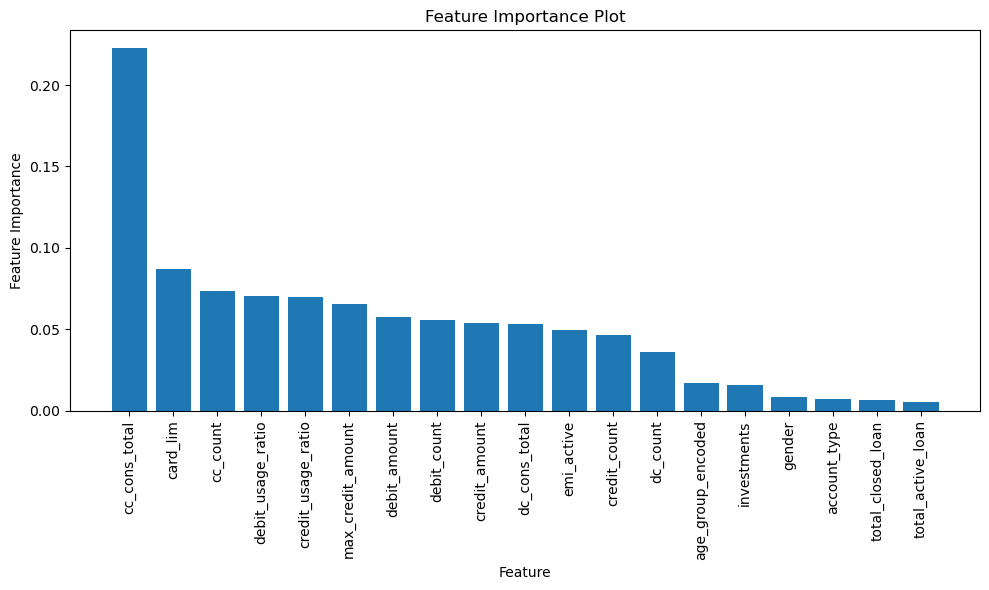

In [88]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Create and fit a RandomForestRegressor model (replace with your model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list)
feature_names = list(x_train.columns)  # Replace with your actual feature names

# Sort feature importances in descending order and get corresponding feature names
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()


In [175]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a HuberRegressor model
model = HuberRegressor()

# Define hyperparameter grid for tuning
param_grid = {
    'epsilon': [1.0, 1.5, 2.0],  # Controls the tolerance to outliers
    'alpha': [0.0001, 0.001, 0.01]  # Regularization strength
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
y_pred = best_model.predict(x_test)



/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

Best Hyperparameters: {'alpha': 0.001, 'epsilon': 2.0}


/Users/vadlamudi.kalyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_pred

In [ ]:
y_pred=np.exp(y_pred)

In [ ]:
y_pred

In [ ]:
submission2 = pd.DataFrame({
        "id":test["id"],
        "cc_cons": y_pred
    })

In [ ]:
submission2

In [ ]:
submission2.to_csv("~/Downloads/submission_file123.csv",index=False)